In [1]:
import numpy as np 
import pandas as pd 
import os
import pickle
from time import sleep

In [2]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier , AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **PREPARING THE DATASET** 

Step1 : LOADING THE DATASET 

In [4]:
## Reading The Dataset
df1 = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


In [5]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

**Since the dataset is divided into 8 parts, we first concatenate it into a single dataframe.**

In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
#  Checking for no of labels present in the dataset 
df[' Label'].value_counts()


 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

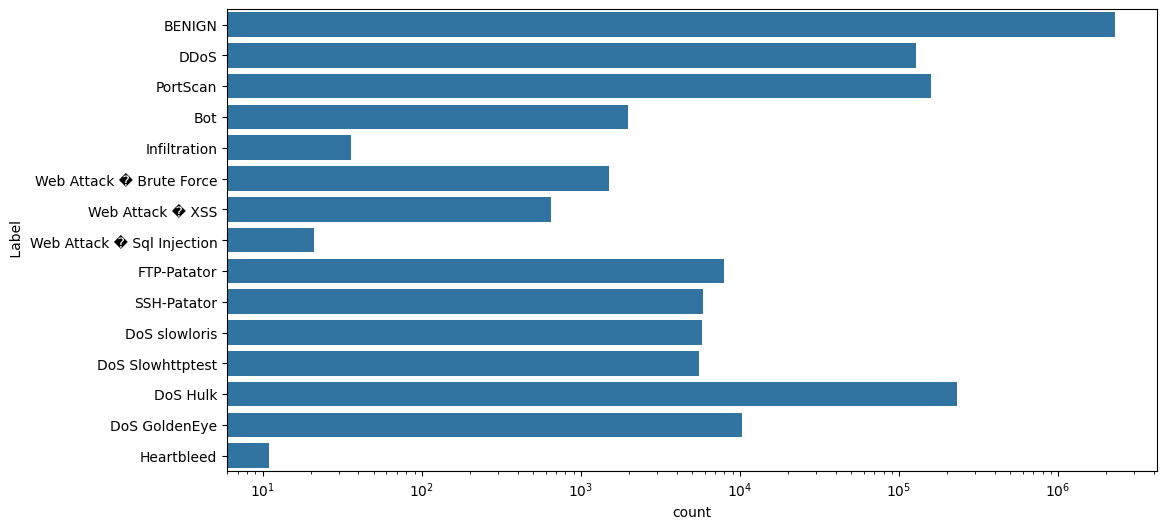

In [8]:
# Visualizing labels in dataset
plt.figure(figsize=(12, 6))
plot = sns.countplot(y=df[' Label'])
plt.xscale('log')
fig = plot.get_figure()
fig.savefig('img1.png')

In [9]:
# Checking For duplicates
df.duplicated().sum()

np.int64(308381)

In [10]:
df.shape


(2830743, 79)

In [11]:
## Dropping the dublicates 
df =  df.drop_duplicates(keep="first")

*Reason : Dropping duplicates ensures each record is unique, enhancing dataset quality and preventing duplicate entries from affecting analyses.*

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape


(2522362, 79)

In [14]:
# Checking for Number of columns
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [15]:
# Checking for null values 
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                   353
 Flow Duration                   0
 Destination Port                0
 Total Backward Packets          0
Total Length of Fwd Packets      0
                              ... 
Idle Mean                        0
 Idle Std                        0
 Idle Max                        0
 Idle Min                        0
 Label                           0
Length: 79, dtype: int64

*Since only null values are present in one column out of 79 columns, and the number of nulls is very small compared to the dataset, we have decided to drop those rows.*

*The rationale behind this approach is that the presence of null values in a small subset of rows is unlikely to significantly impact the overall dataset's integrity or analysis results. By dropping these rows, we can ensure that the dataset remains clean and that our analyses are based on complete and reliable data*

In [16]:
# dropping rows with null values 
df.dropna(inplace=True)

In [17]:
df.shape


(2522009, 79)

In [18]:
df.isnull().sum().sort_values(ascending = False)


# Verifying once more for certainty.

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [19]:
df.shape


(2522009, 79)

In [20]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()


#Filter the DataFrame to include only labels with more than 10,000 occurrences and then count the occurrences of each label.

 Label
BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
DoS GoldenEye      10286
Name: count, dtype: int64

In [21]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [22]:
df.shape


(2498101, 79)

In [23]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
# Removing infinite values that are present in the dataset


In [24]:
df.shape

(2496897, 79)

In [ ]:
y 

In [25]:
from sklearn.preprocessing import LabelEncoder

# Convert 'label to a numerical value
label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}


*The rationale behind choosing a correlation threshold of around 0.85, is to identify highly correlated features in a dataset with a high number of data columns. This threshold helps in selecting datapoints that exhibit strong linear relationships, which can be valuable for various analyses, such as feature selection or identifying multicollinearity.*

In [28]:
df.drop(corr_features,axis=1,inplace=True)

In [29]:
y = df[' Label']
x = df.drop([' Label'],axis=1)

In [30]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,...,0,0,0,0,33,-1,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,...,0,0,0,0,29,256,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,...,0,0,0,0,29,256,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,...,0,0,0,0,31,329,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,...,0,0,0,0,32,-1,0.0,0.0,0,0.0


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name:  Label, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE


In [33]:
# Since the dataset in imbalance and big so we are using this for balancing the dataset
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)
# Xn.value_counts()

*The rationale behind using RUS in this context is to address the class imbalance issue in the dataset. By balancing the dataset, the model can potentially learn better from both the majority and minority classes, leading to improved performance, especially for tasks where the minority class is of particular interest.*

In [34]:
Xn.head()
Xn.shape

(51430, 41)

In [35]:
## Preprocessing 
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [37]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [38]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

*Imputing the dataset using simpleimputer strategy as mean*

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train_scaled)
# X_test = imputer.transform(X_test)

#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

c:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [16 17 18 29 30 31 32 33 34]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\mithu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
model = LogisticRegression(max_iter=10000,penalty='l2')  # Increase max_iter
model.fit(X_train_scaled, Y_train)


# MODEL TRAINING

In [ ]:
Predict_X =  model.predict(X_train_scaled)
scores = cross_val_score(model, X_train_scaled, Y_train, cv=10)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X)

Training Metrics for Logistic Regression

In [118]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9240021907494832

Model Accuracy:
 0.9251409683064359

Confusion matrix:
 [[6175  265  246   87  420]
 [   0 6904    3  298    0]
 [ 386  176 6655    0    0]
 [  27  487  191 6460    0]
 [  86    6   11    6 7112]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      7193
           1       0.88      0.96      0.92      7205
           2       0.94      0.92      0.93      7217
           3       0.94      0.90      0.92      7165
           4       0.94      0.98      0.96      7221

    accuracy                           0.93     36001
   macro avg       0.93      0.93      0.92     36001
weighted avg       0.93      0.93      0.92     36001



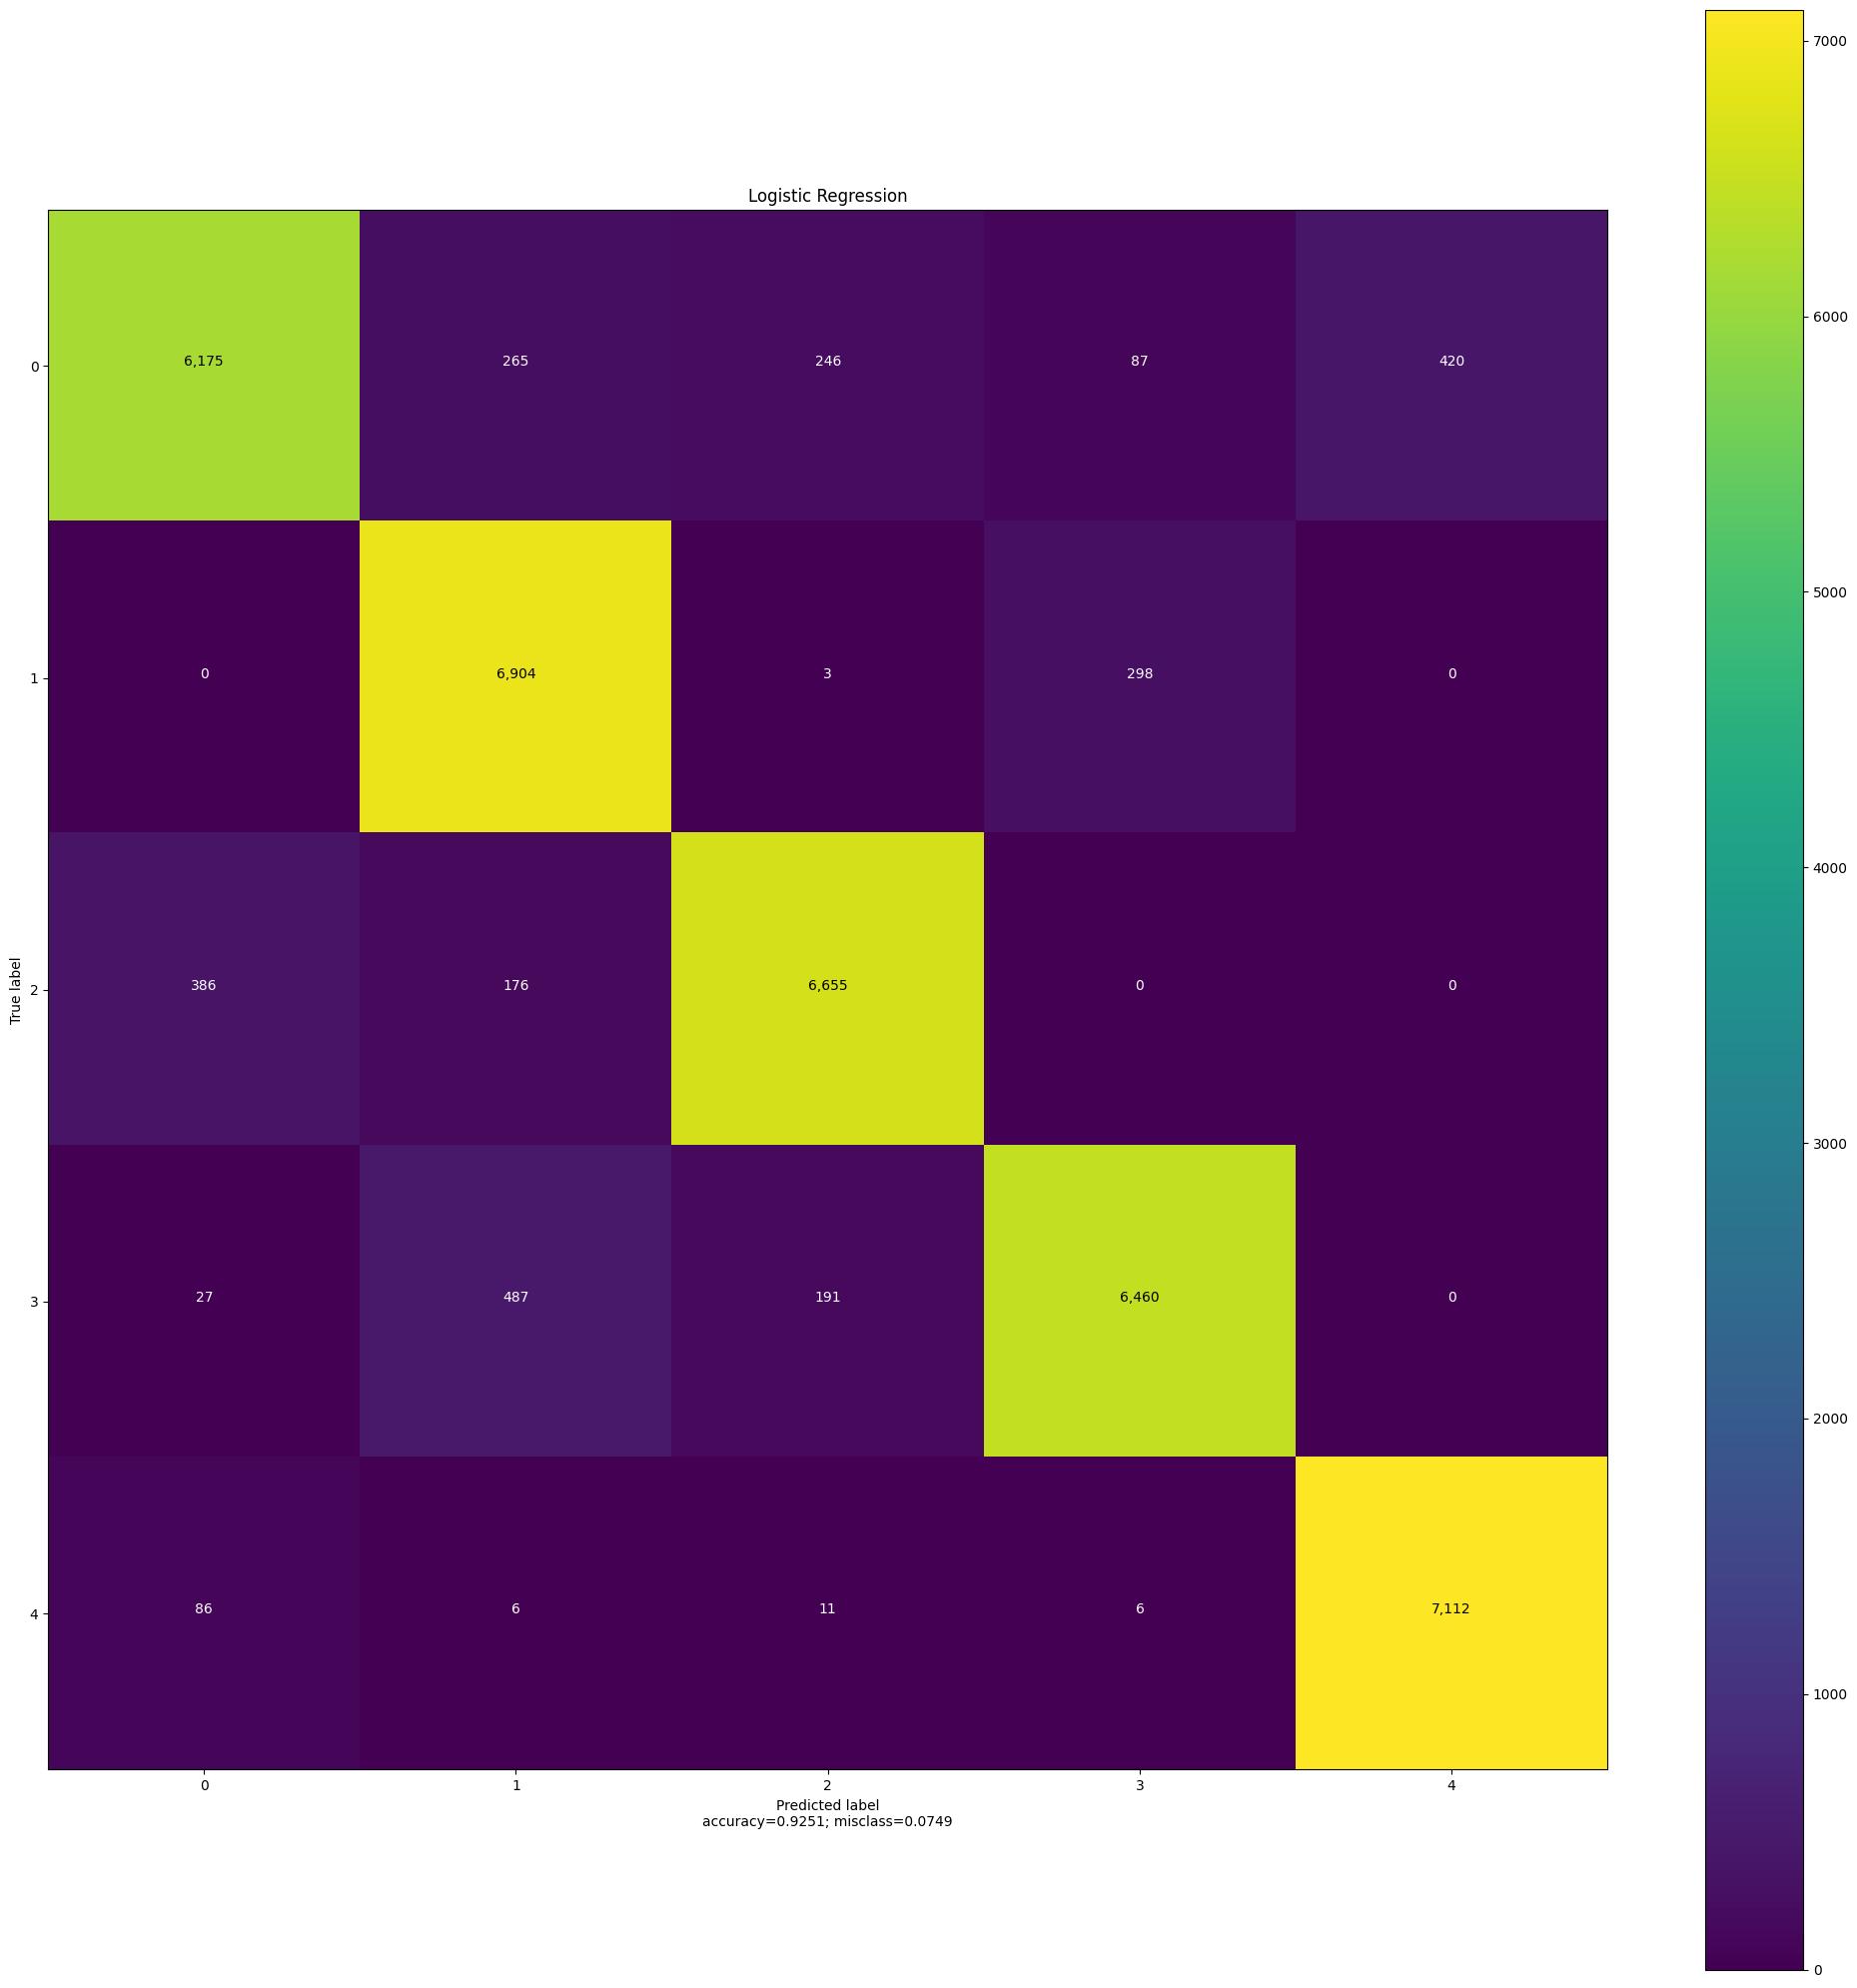

<Figure size 640x480 with 0 Axes>

In [119]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Logistic Regression')

In [120]:
Predict_X =  model.predict(X_test_scaled)
scores = cross_val_score(model, X_test_scaled, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X)

In [121]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9158078448085283

Model Accuracy:
 0.9255298463931557

Confusion matrix:
 [[2650  121  110   34  178]
 [   0 2935    2  143    1]
 [ 140   70 2859    0    0]
 [  11  201   87 2822    0]
 [  43    1    3    4 3014]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      3093
           1       0.88      0.95      0.92      3081
           2       0.93      0.93      0.93      3069
           3       0.94      0.90      0.92      3121
           4       0.94      0.98      0.96      3065

    accuracy                           0.93     15429
   macro avg       0.93      0.93      0.93     15429
weighted avg       0.93      0.93      0.93     15429



In [122]:
decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [124]:
Predict_X =  decision.predict(X_train)
scores1 = cross_val_score(decision, X_train, Y_train, cv=10)
accuracy1 = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix1 = metrics.confusion_matrix(Y_train, Predict_X)
classification1 = metrics.classification_report(Y_train, Predict_X)

In [125]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores1.mean())
print()
print ("Model Accuracy:" "\n", accuracy1)
print()
print("Confusion matrix:" "\n", confusion_matrix1)
print()
print("Classification report:" "\n", classification1) 


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9972778533929613

Model Accuracy:
 1.0

Confusion matrix:
 [[7193    0    0    0    0]
 [   0 7205    0    0    0]
 [   0    0 7217    0    0]
 [   0    0    0 7165    0]
 [   0    0    0    0 7221]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7193
           1       1.00      1.00      1.00      7205
           2       1.00      1.00      1.00      7217
           3       1.00      1.00      1.00      7165
           4       1.00      1.00      1.00      7221

    accuracy                           1.00     36001
   macro avg       1.00      1.00      1.00     36001
weighted avg       1.00      1.00      1.00     36001



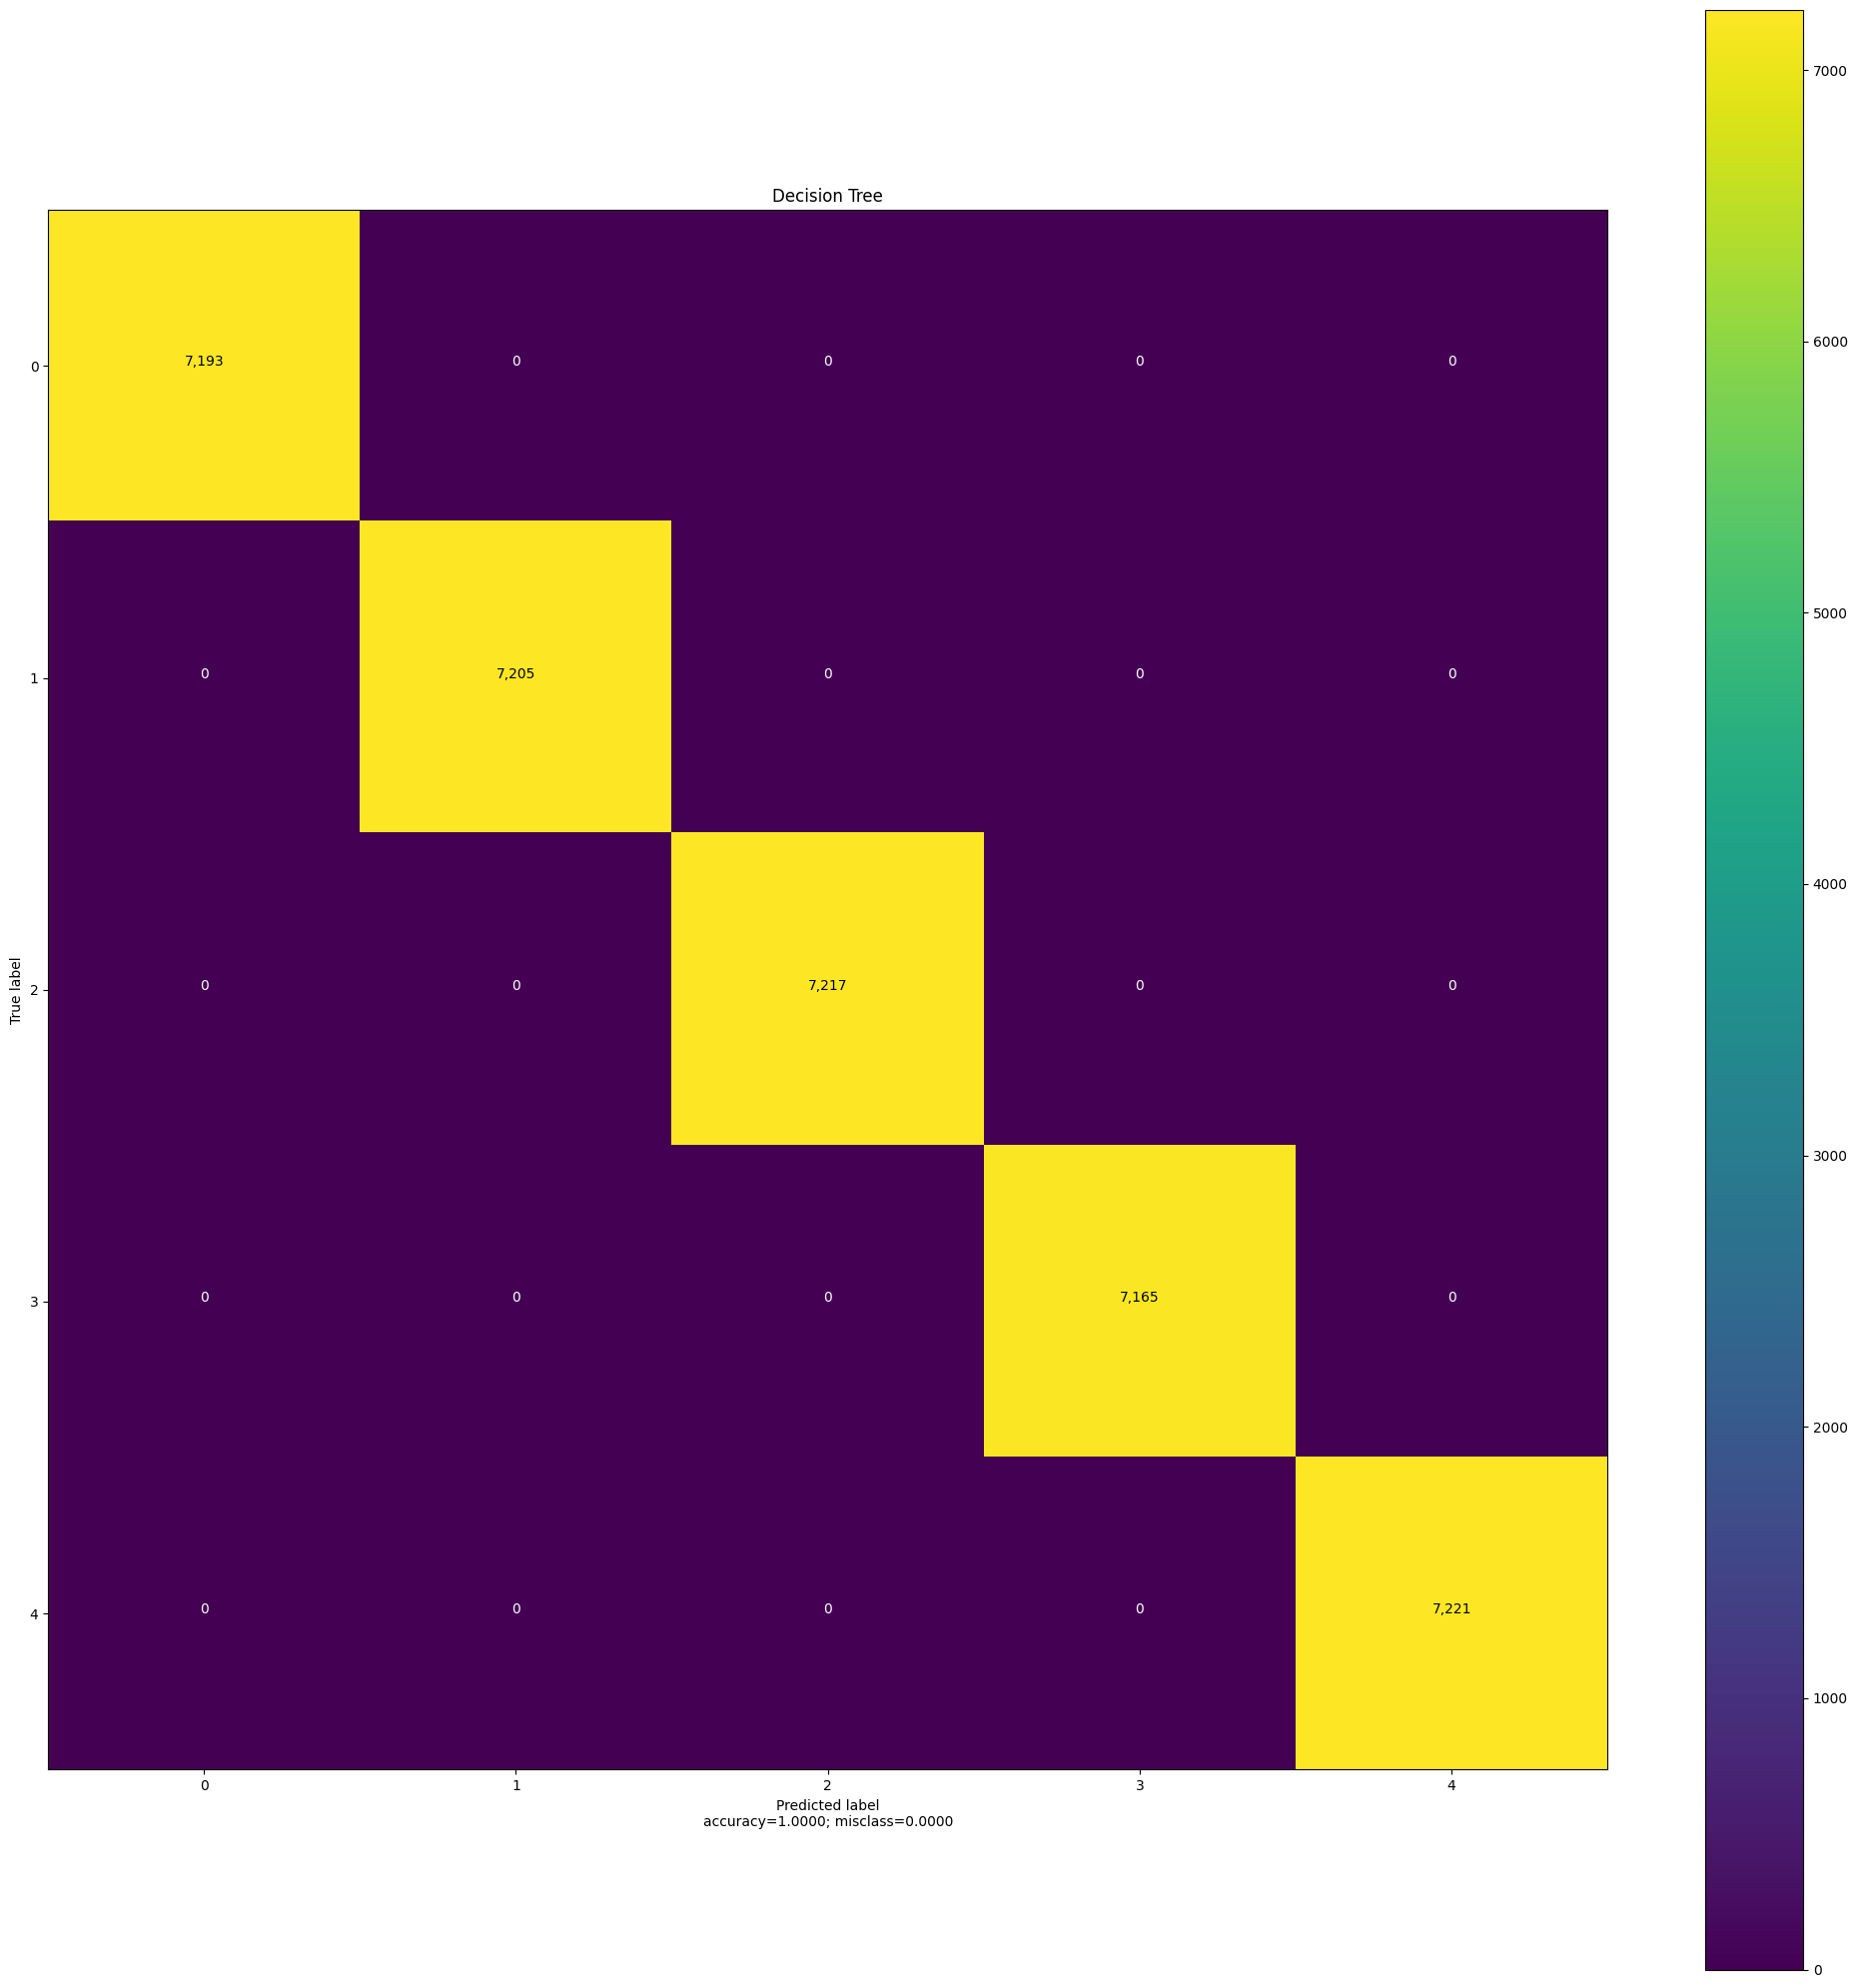

<Figure size 640x480 with 0 Axes>

In [126]:
plot_confusion_matrix(cm=confusion_matrix1 ,title= 'Decision Tree')

In [176]:
Predict_X =  decision.predict(X_test_scaled)
scores = cross_val_score(decision, X_test_scaled, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X, zero_division=1)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [131]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores1.mean())
print()
print ("Model Accuracy:" "\n", accuracy1)
print()
print("Confusion matrix:" "\n", confusion_matrix1)
print()
print("Classification report:" "\n", classification1) 


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9972778533929613

Model Accuracy:
 1.0

Confusion matrix:
 [[7193    0    0    0    0]
 [   0 7205    0    0    0]
 [   0    0 7217    0    0]
 [   0    0    0 7165    0]
 [   0    0    0    0 7221]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7193
           1       1.00      1.00      1.00      7205
           2       1.00      1.00      1.00      7217
           3       1.00      1.00      1.00      7165
           4       1.00      1.00      1.00      7221

    accuracy                           1.00     36001
   macro avg       1.00      1.00      1.00     36001
weighted avg       1.00      1.00      1.00     36001



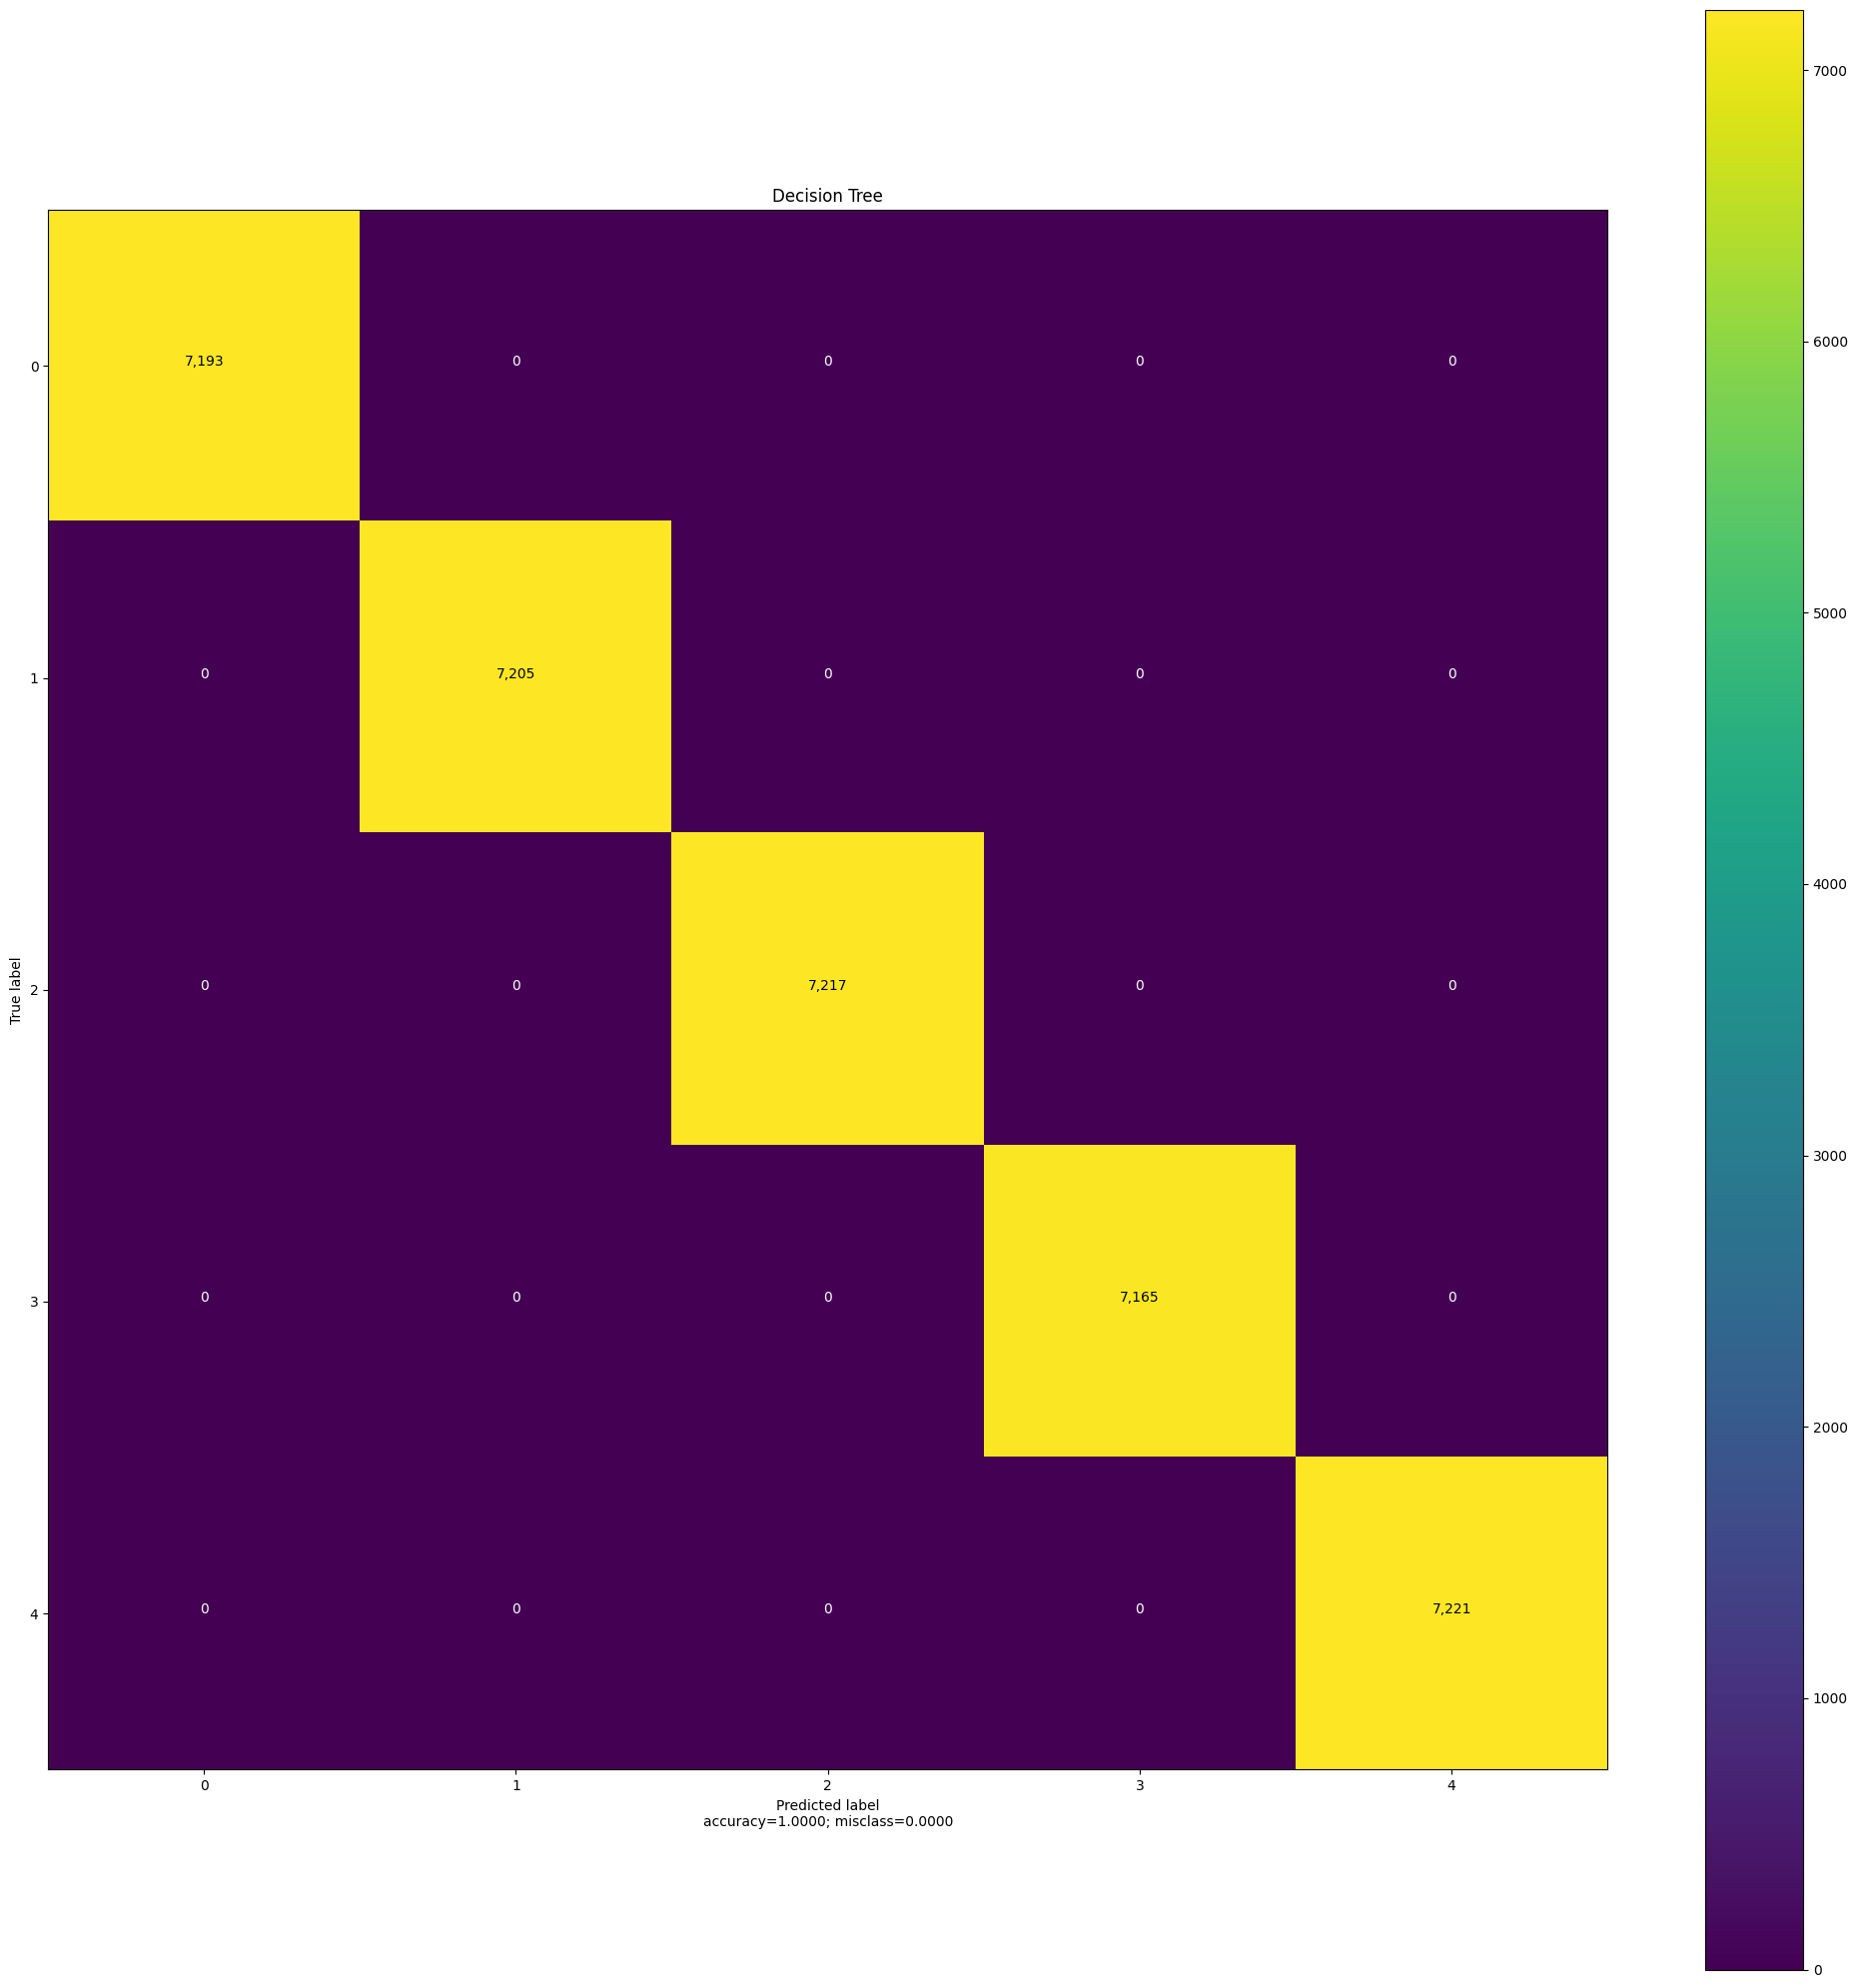

<Figure size 640x480 with 0 Axes>

In [132]:
plot_confusion_matrix(cm=confusion_matrix1 ,title= 'Decision Tree')

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

start = time.time()
Random_Forest = RFC(max_depth=40) 
Random_Forest.fit(X_train_scaled, Y_train) 


filename = '/kaggle/working/random_model1.pkl'
pickle.dump(Random_Forest, open(filename, 'wb')) 

In [40]:
# importance = Random_Forest.feature_importances_

In [41]:
importance 
np.argsort(importance)[::-1]

array([ 4, 25, 24,  2,  1,  3,  9, 16,  8, 14, 20,  0, 15,  6, 11, 12,  7,
       17,  5, 10, 21, 23, 18, 27, 26, 28, 22, 29, 13, 19], dtype=int64)

In [139]:
from sklearn import metrics
Predict_X =  Random_Forest.predict(X_train_scaled)
scores2 = cross_val_score(Random_Forest, X_train_scaled, Y_train, cv=10)
accuracy2 = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix2 = metrics.confusion_matrix(Y_train, Predict_X)
classification2 = metrics.classification_report(Y_train, Predict_X)




In [140]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy2)
print()
print("Confusion matrix:" "\n", confusion_matrix2)
print()
print("Classification report:" "\n", classification2) 
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9158078448085283

Model Accuracy:
 0.9998611149690286

Confusion matrix:
 [[7188    0    0    0    5]
 [   0 7205    0    0    0]
 [   0    0 7217    0    0]
 [   0    0    0 7165    0]
 [   0    0    0    0 7221]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7193
           1       1.00      1.00      1.00      7205
           2       1.00      1.00      1.00      7217
           3       1.00      1.00      1.00      7165
           4       1.00      1.00      1.00      7221

    accuracy                           1.00     36001
   macro avg       1.00      1.00      1.00     36001
weighted avg       1.00      1.00      1.00     36001




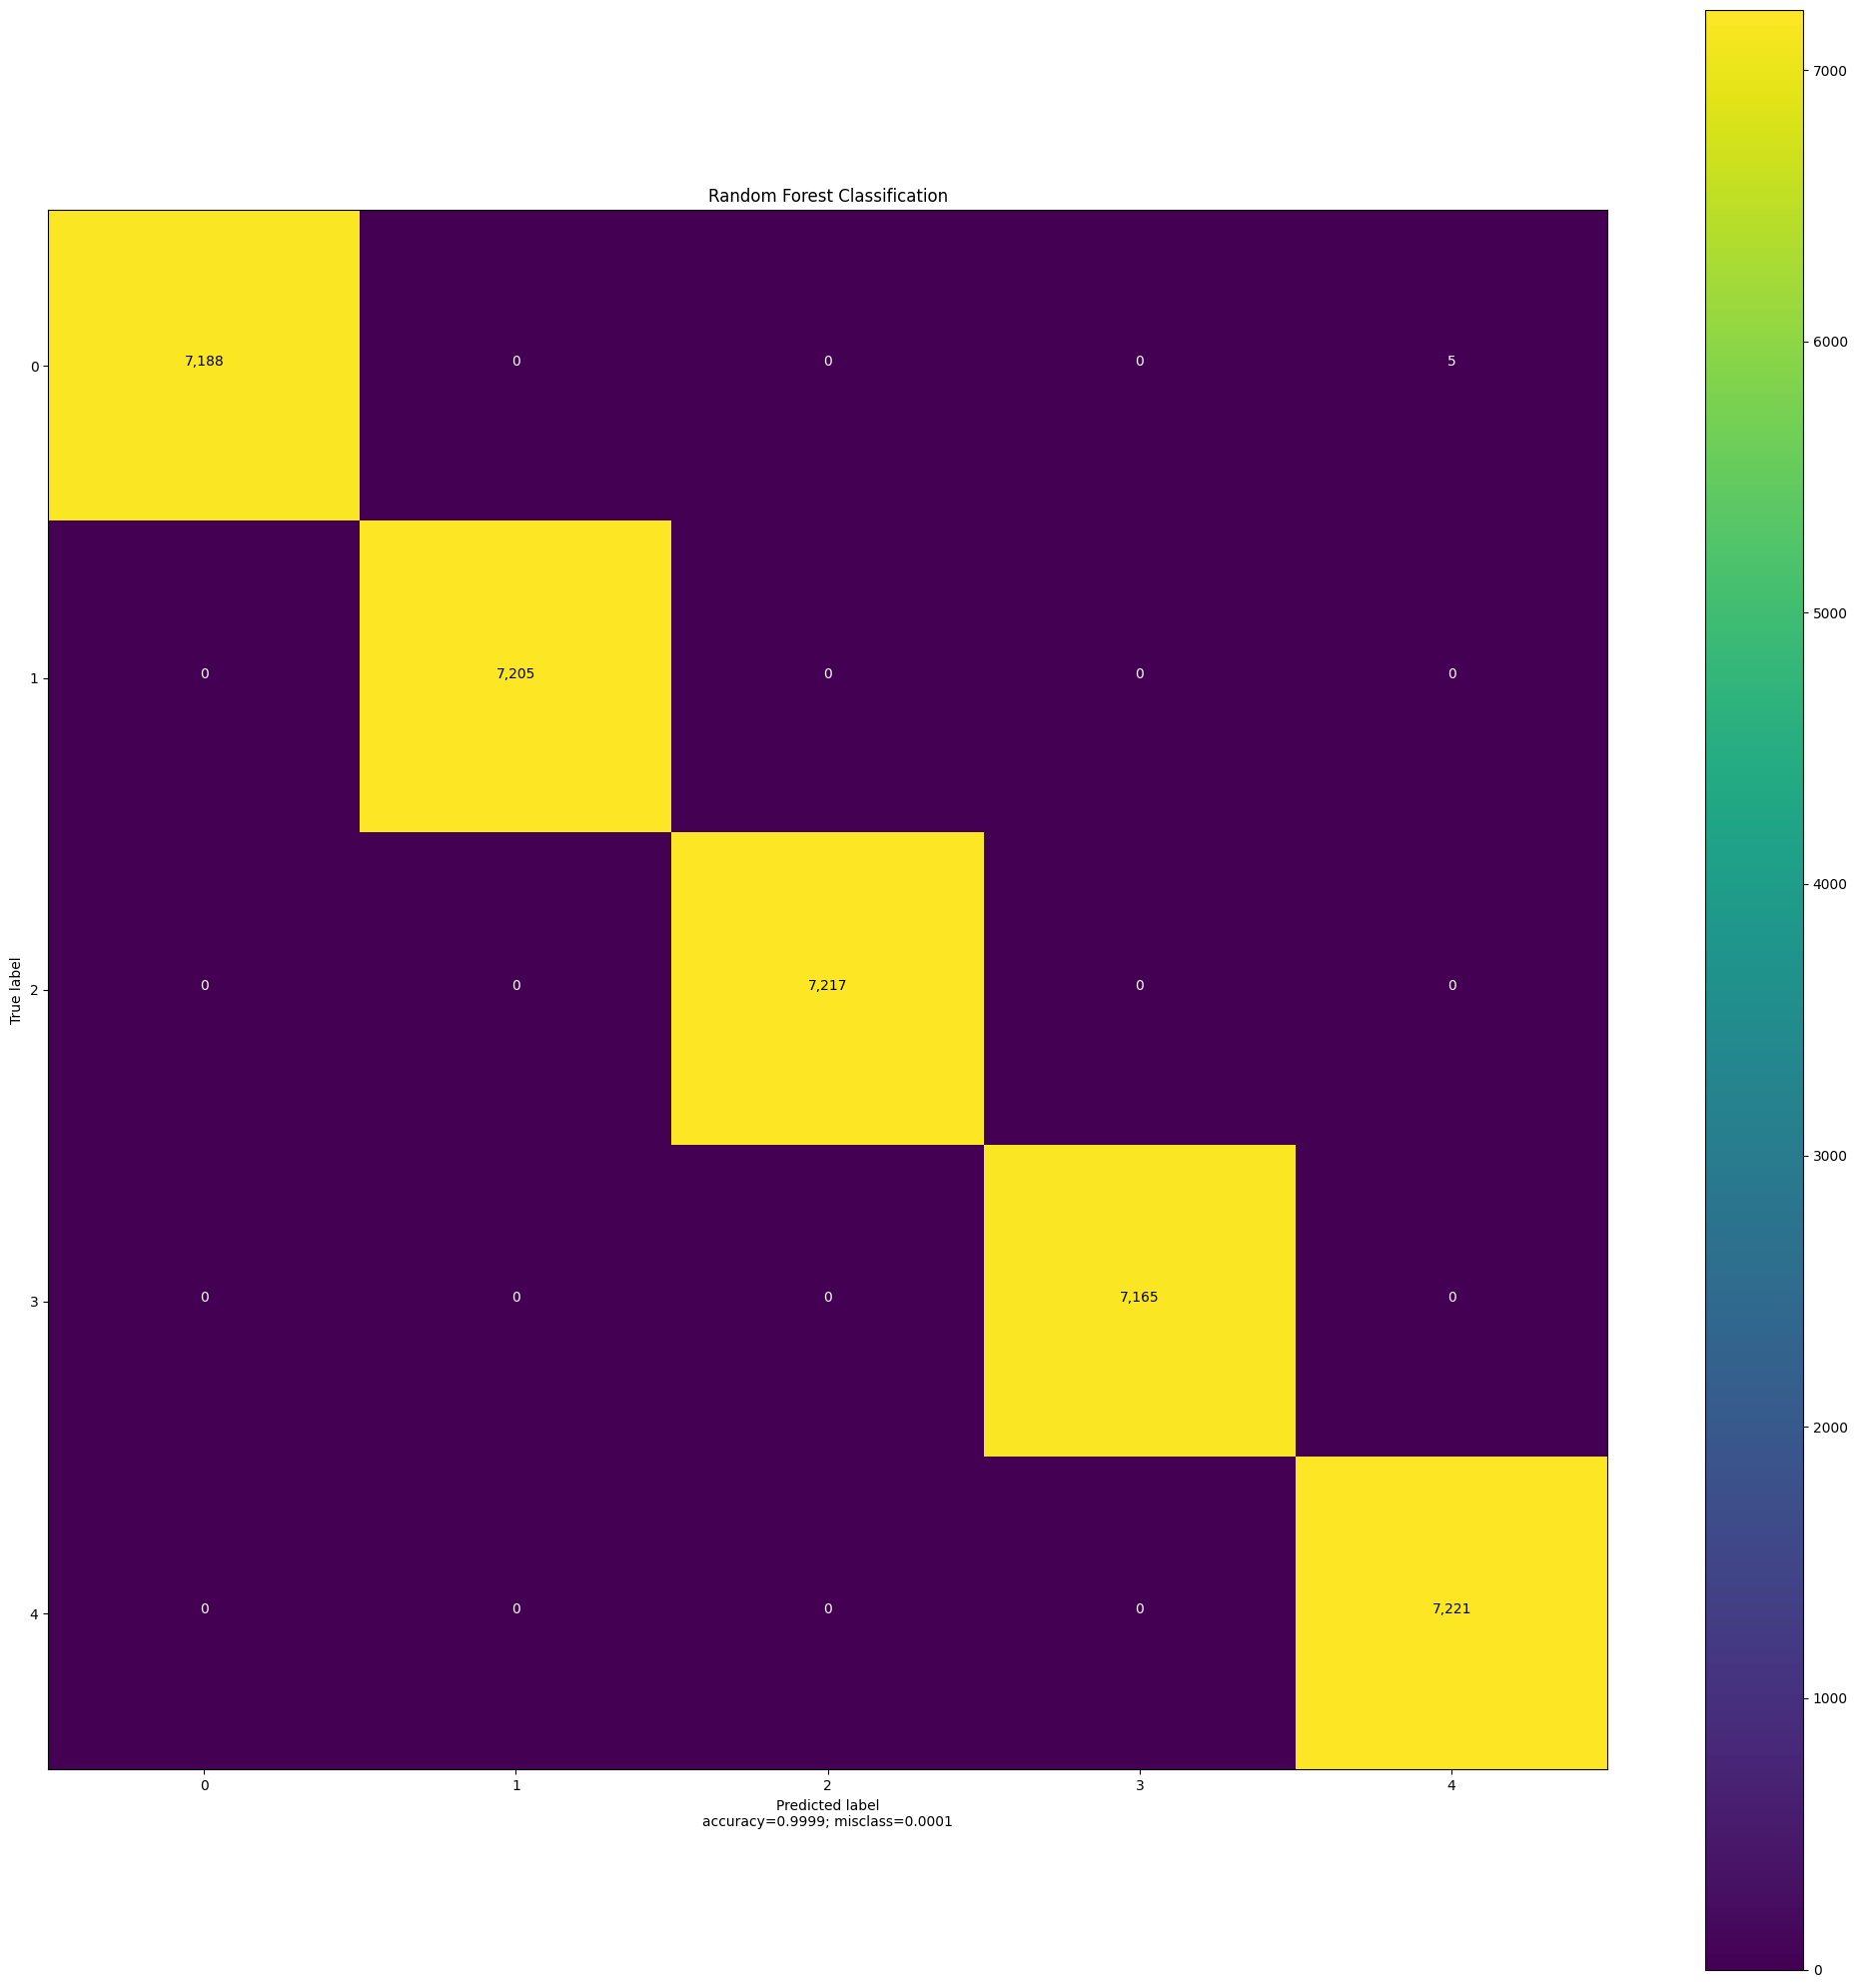

<Figure size 640x480 with 0 Axes>

In [141]:
plot_confusion_matrix(cm=confusion_matrix2 ,title= 'Random Forest Classification')

In [144]:
Predict_X =  Random_Forest.predict(X_test_scaled)
scores3 = cross_val_score(Random_Forest, X_test_scaled, Y_test, cv=10)
accuracy3 = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix3 = metrics.confusion_matrix(Y_test, Predict_X)
classification3 = metrics.classification_report(Y_test, Predict_X)


In [145]:
print()
print('--------------------------- Results --------------------------------')
print()
print()
print ("Model Accuracy:" "\n", accuracy3)
print()
print("Confusion matrix:" "\n", confusion_matrix3)
print()
print("Classification report:" "\n", classification3) 
print()


--------------------------- Results --------------------------------


Model Accuracy:
 0.9989629917687471

Confusion matrix:
 [[3088    0    0    3    2]
 [   0 3081    0    0    0]
 [   4    0 3065    0    0]
 [   0    0    2 3116    3]
 [   2    0    0    0 3063]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3093
           1       1.00      1.00      1.00      3081
           2       1.00      1.00      1.00      3069
           3       1.00      1.00      1.00      3121
           4       1.00      1.00      1.00      3065

    accuracy                           1.00     15429
   macro avg       1.00      1.00      1.00     15429
weighted avg       1.00      1.00      1.00     15429




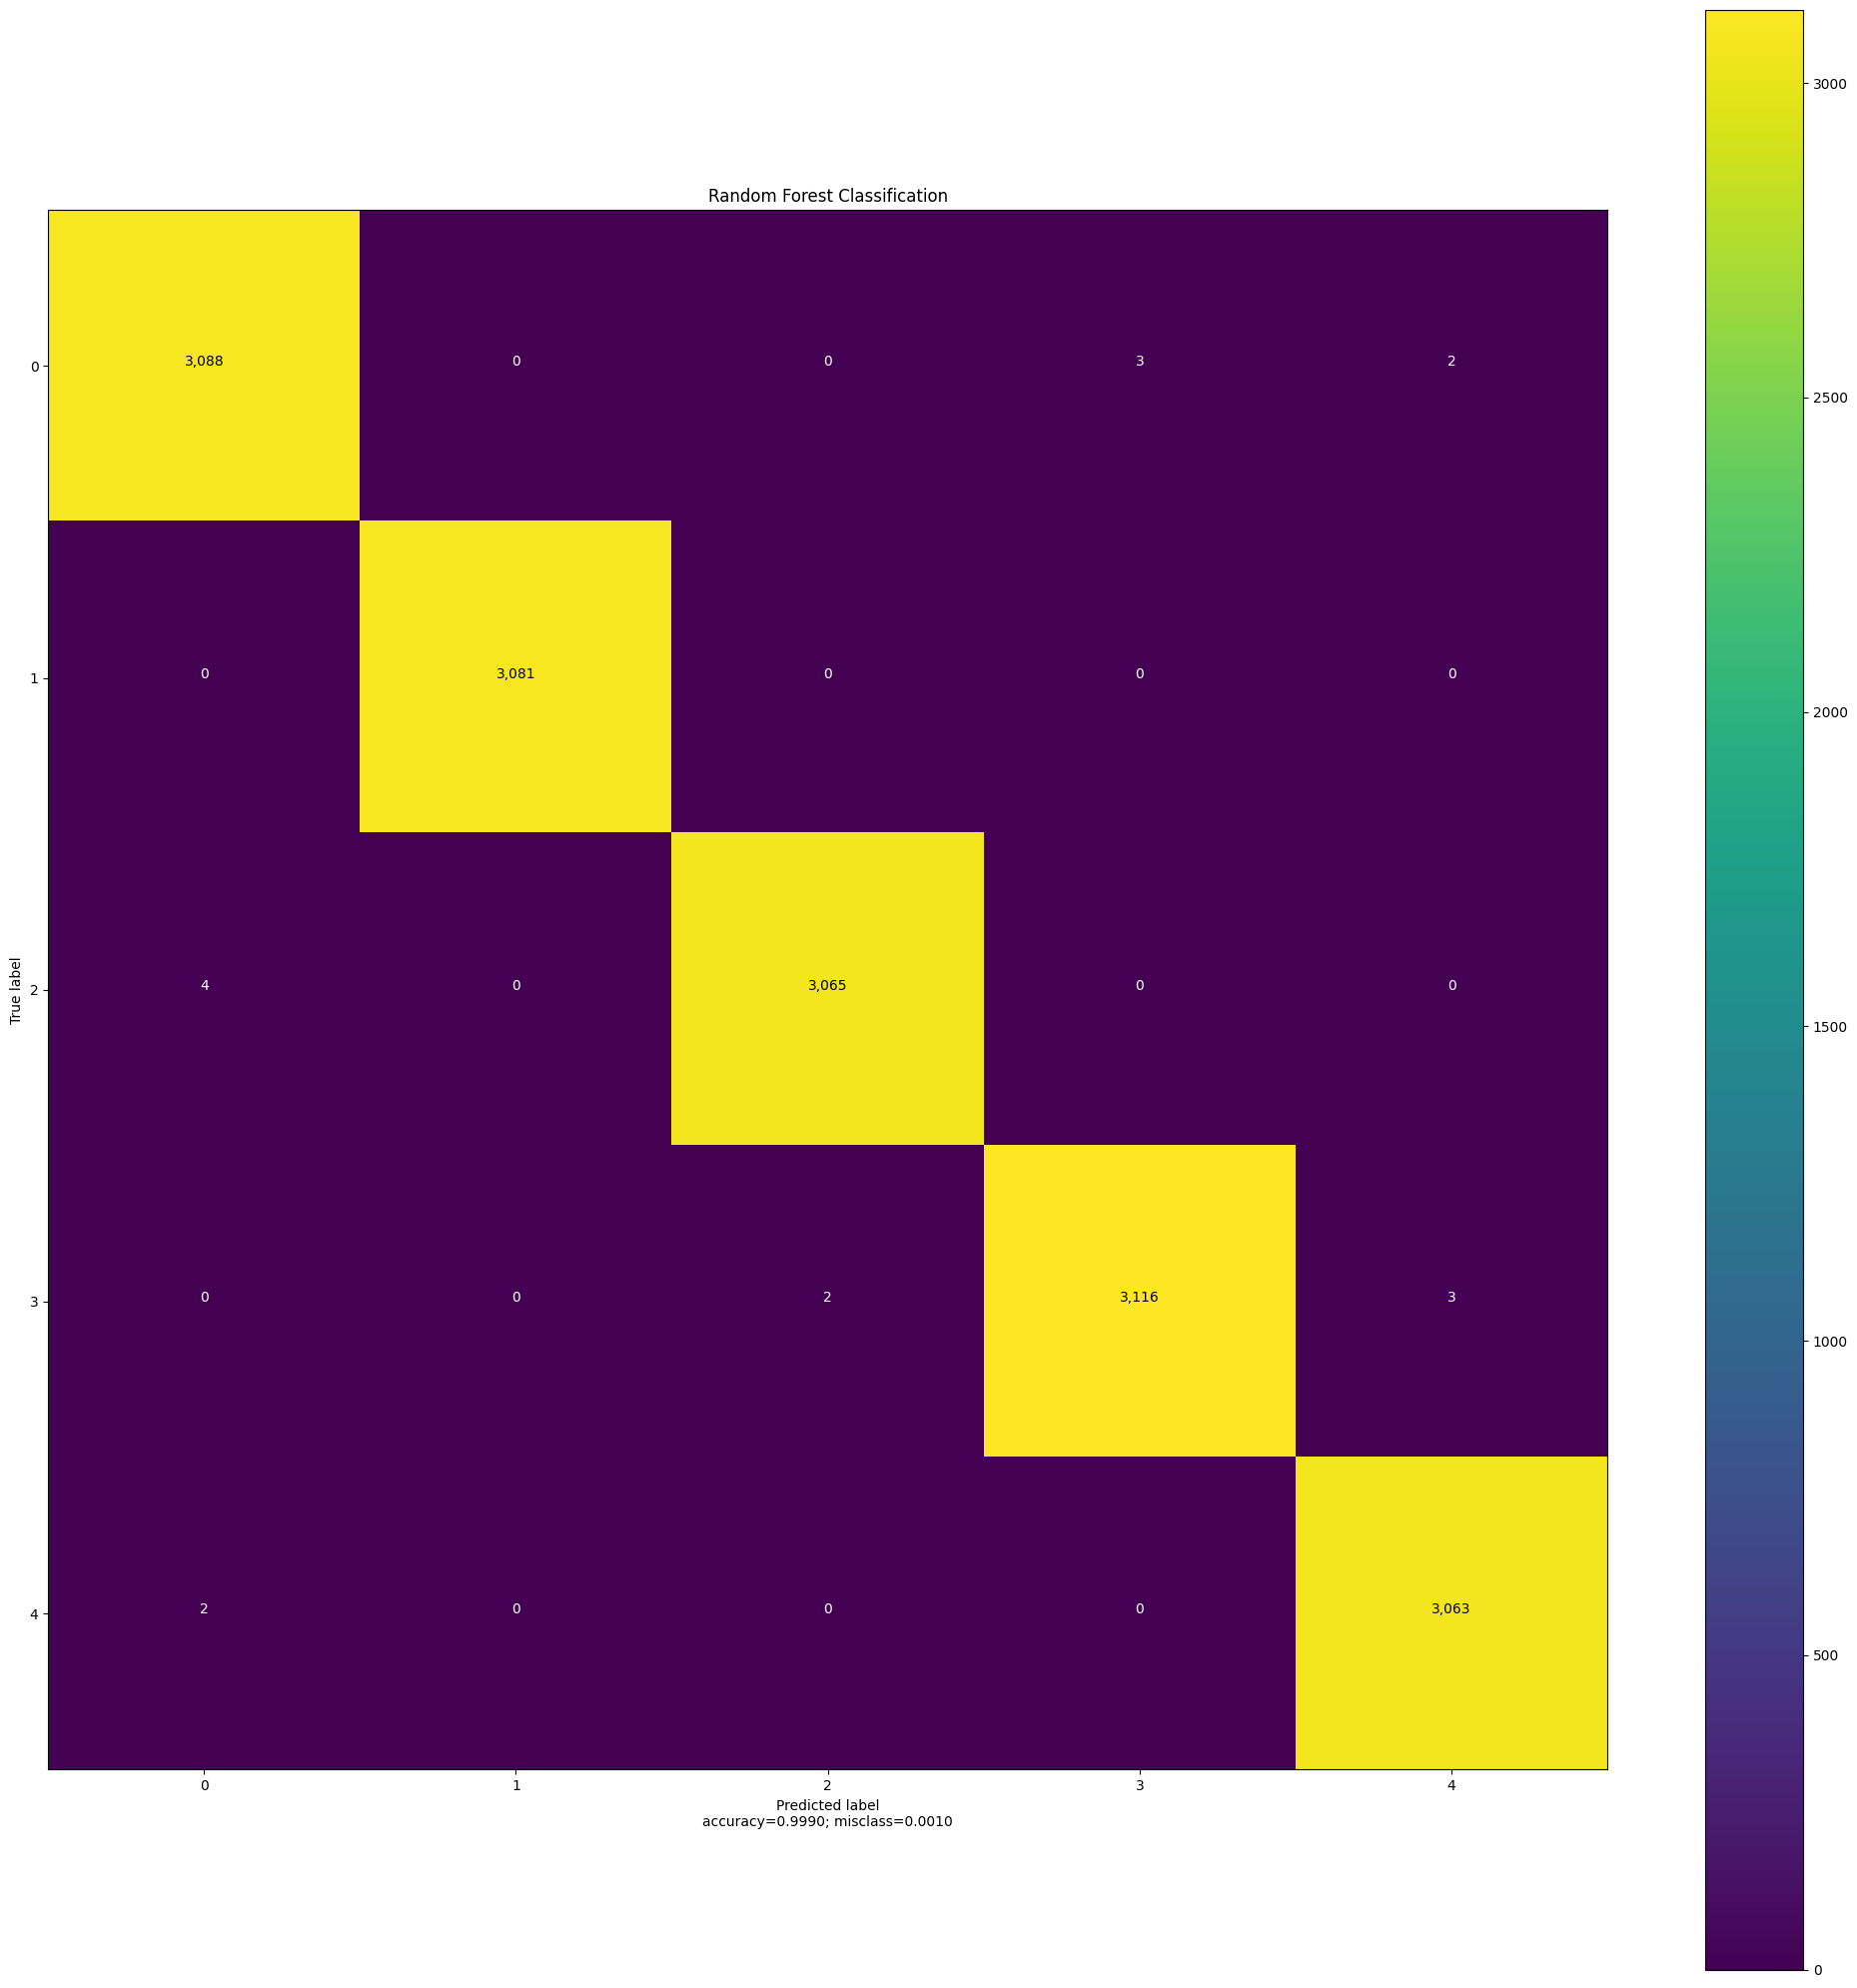

<Figure size 640x480 with 0 Axes>

In [146]:
plot_confusion_matrix(cm=confusion_matrix3 ,title= 'Random Forest Classification')

In [147]:
from sklearn.svm import SVC

In [149]:
svm_clf = SVC()

SVC()

In [151]:
svm_clf.fit(X_train_scaled, Y_train) 

SVC()

In [152]:
Predict_X =  svm_clf .predict(X_train_scaled)
scores2 = cross_val_score(svm_clf , X_train_scaled, Y_train, cv=10)
accuracy2 = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix2 = metrics.confusion_matrix(Y_train, Predict_X)
classification2 = metrics.classification_report(Y_train, Predict_X)

In [154]:
print()
print('--------------------------- Results --------------------------------')
print()
print()
print ("Model Accuracy:" "\n", accuracy2)
print()
print("Confusion matrix:" "\n", confusion_matrix2)
print()
print("Classification report:" "\n", classification2) 
print()


--------------------------- Results --------------------------------


Model Accuracy:
 0.9596122329935279

Confusion matrix:
 [[6644  233  105   54  157]
 [   4 7013    3  185    0]
 [   4  118 7073   22    0]
 [   9  413   33 6710    0]
 [  97    6    5    6 7107]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      7193
           1       0.90      0.97      0.94      7205
           2       0.98      0.98      0.98      7217
           3       0.96      0.94      0.95      7165
           4       0.98      0.98      0.98      7221

    accuracy                           0.96     36001
   macro avg       0.96      0.96      0.96     36001
weighted avg       0.96      0.96      0.96     36001




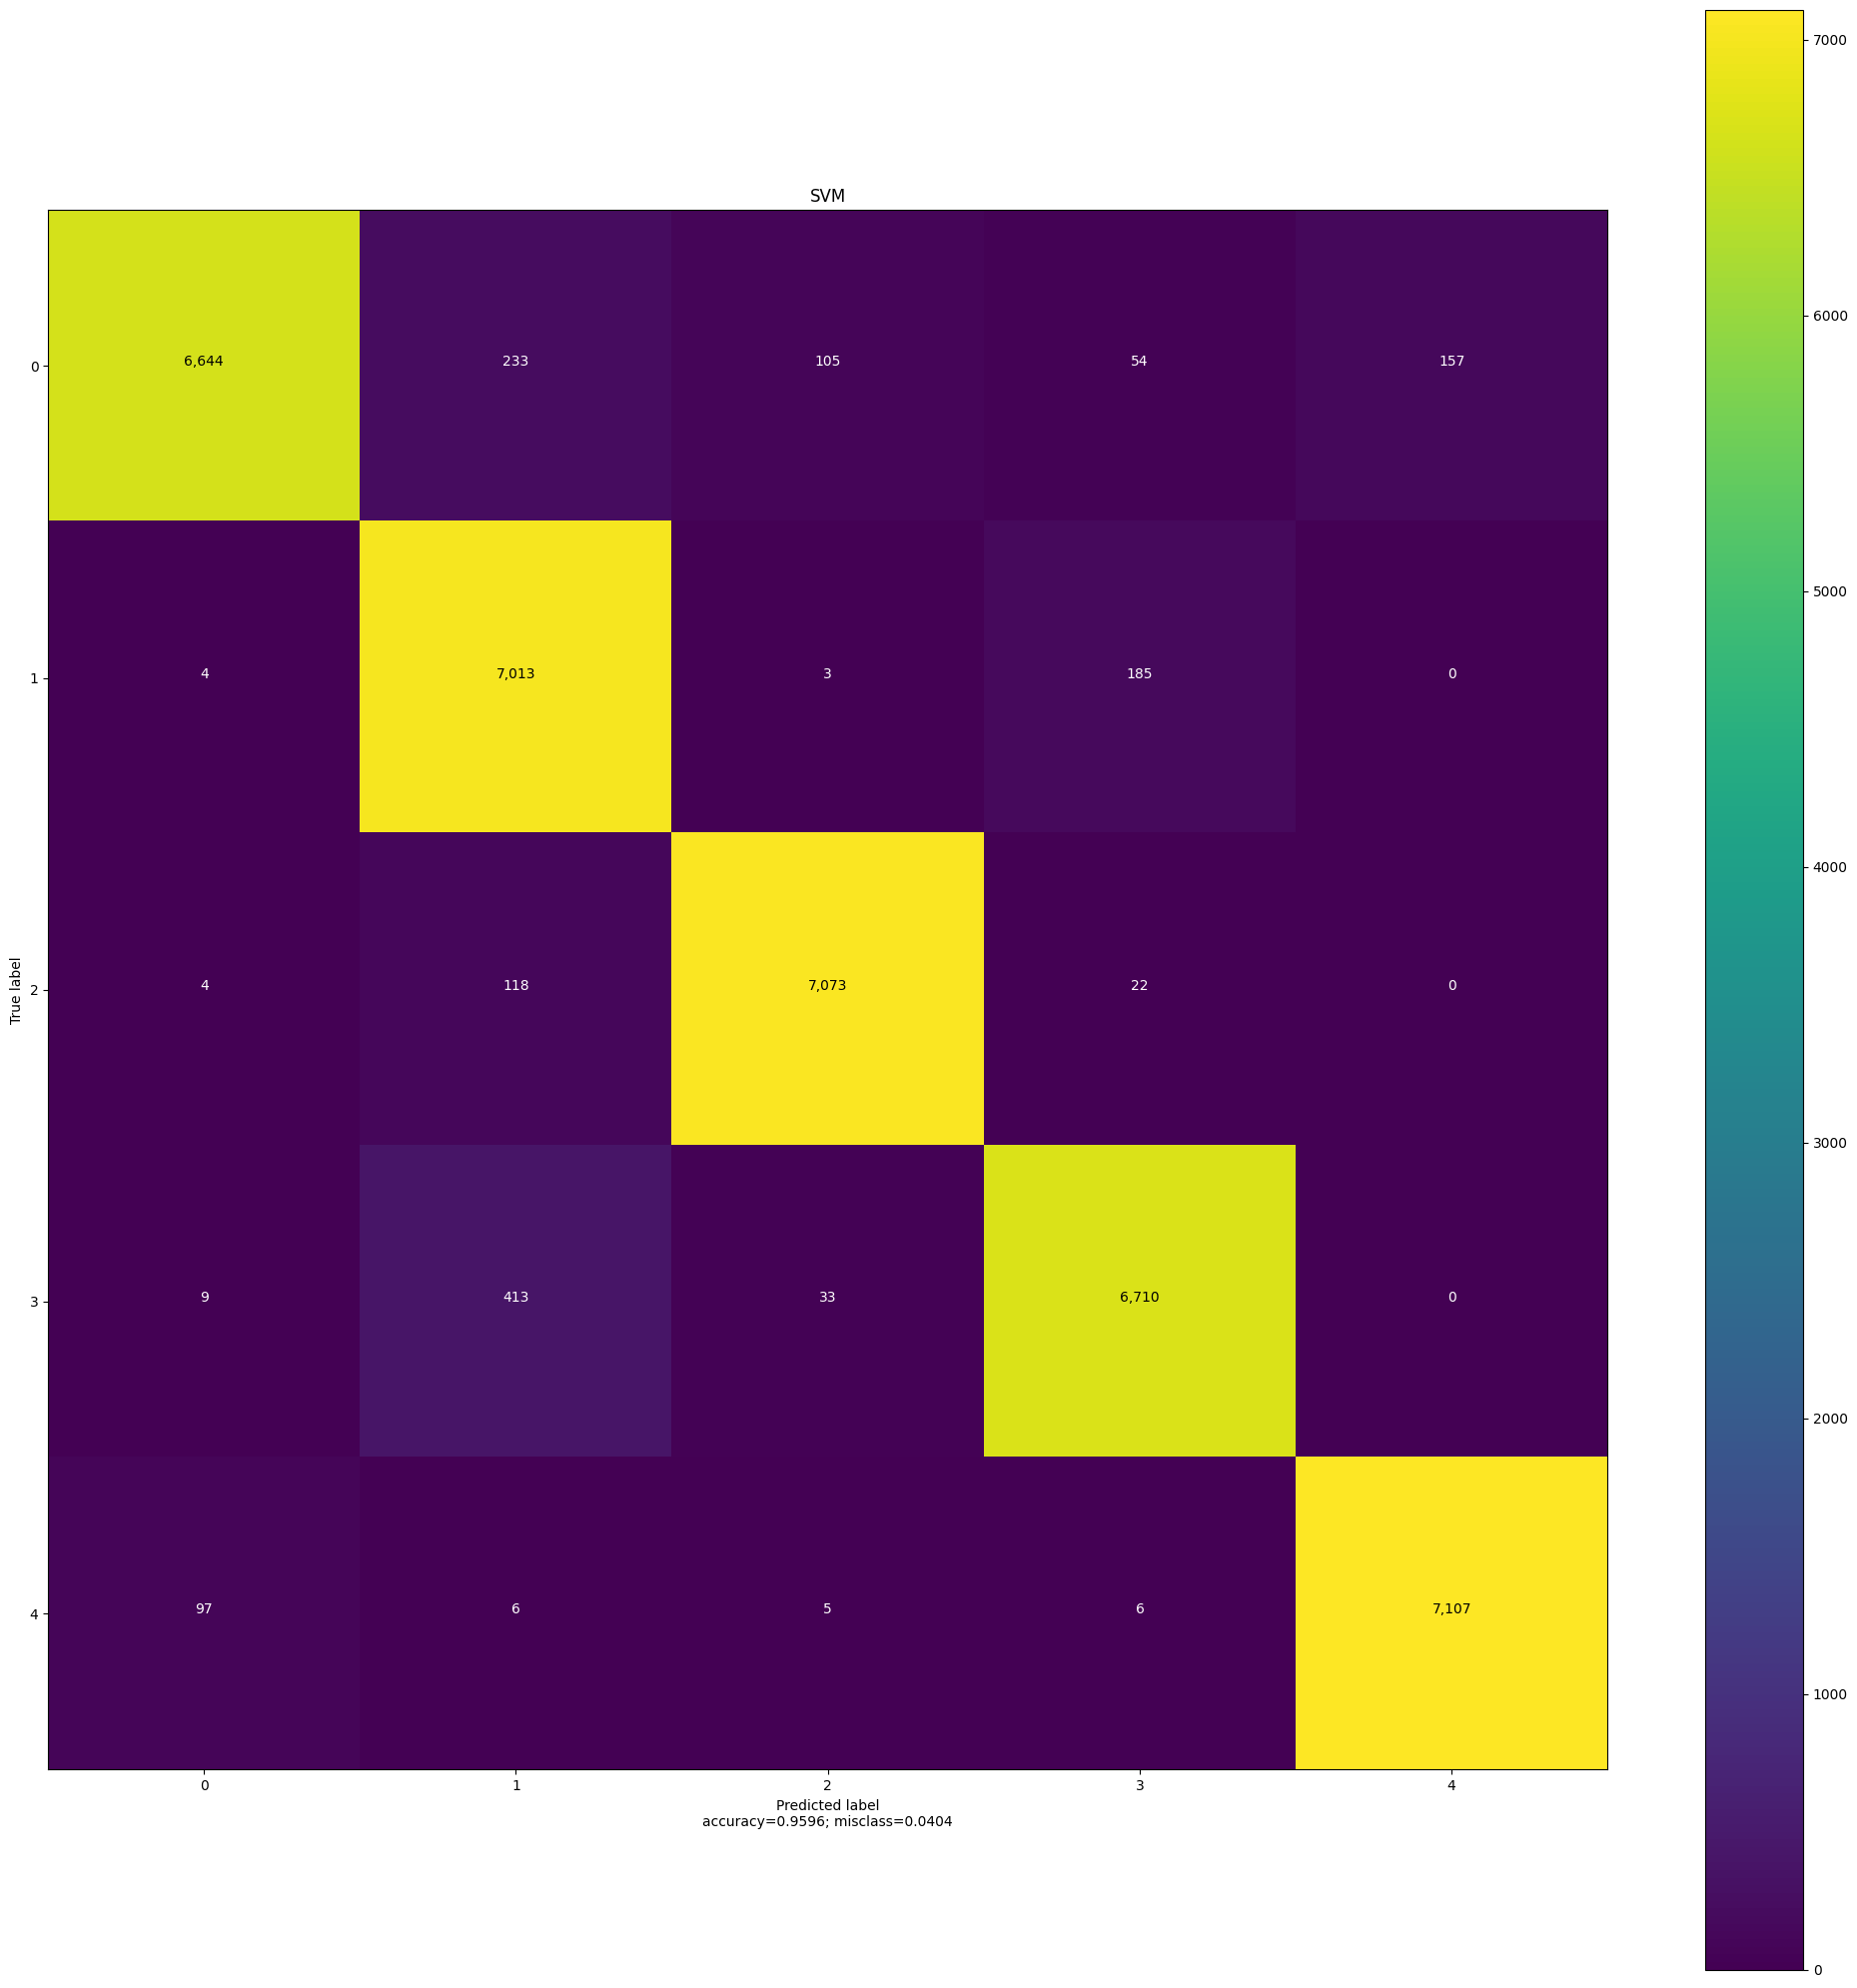

<Figure size 640x480 with 0 Axes>

In [156]:
plot_confusion_matrix(cm=confusion_matrix2 ,title= 'SVM')

In [158]:
Predict_X =  svm_clf.predict(X_test_scaled)
scores = cross_val_score(svm_clf, X_test_scaled, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X, zero_division=1)

In [159]:
print()
print('--------------------------- Results --------------------------------')
print()
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


--------------------------- Results --------------------------------


Model Accuracy:
 0.9593622399377795

Confusion matrix:
 [[2853  103   38   30   69]
 [   2 2992    1   86    0]
 [   4   44 3012    9    0]
 [   3  172   15 2931    0]
 [  46    1    0    4 3014]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      3093
           1       0.90      0.97      0.94      3081
           2       0.98      0.98      0.98      3069
           3       0.96      0.94      0.95      3121
           4       0.98      0.98      0.98      3065

    accuracy                           0.96     15429
   macro avg       0.96      0.96      0.96     15429
weighted avg       0.96      0.96      0.96     15429




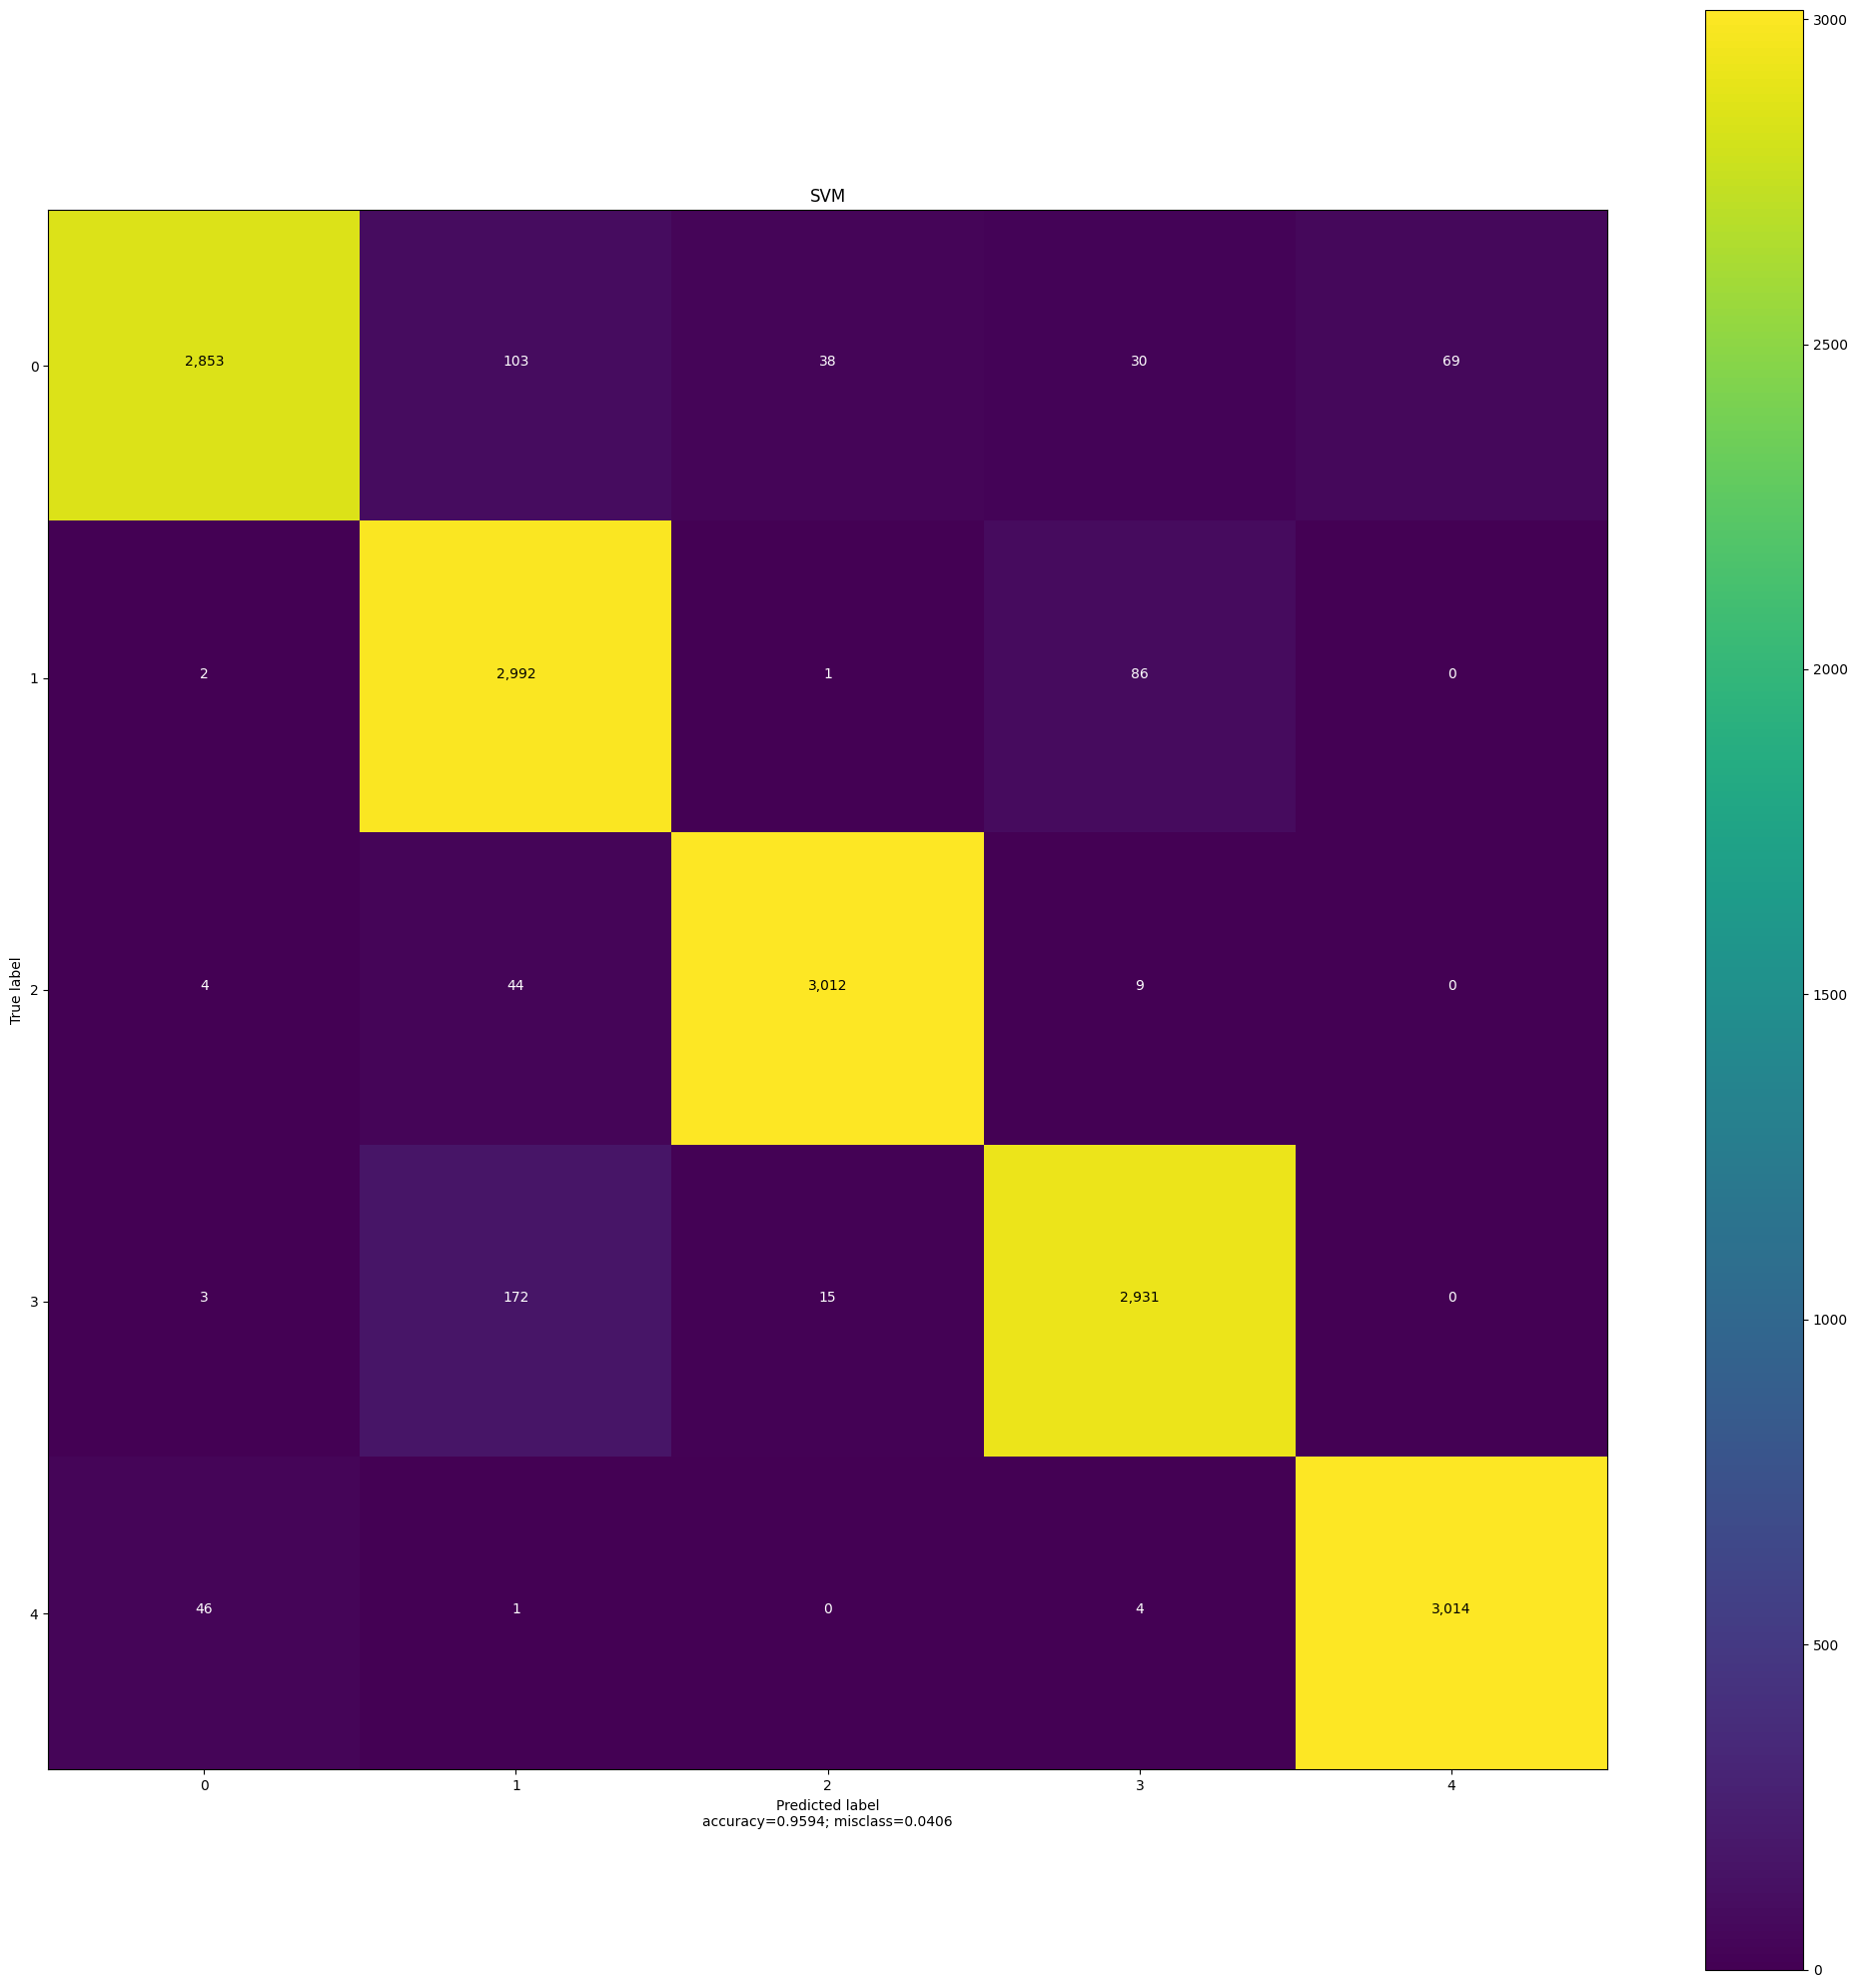

<Figure size 640x480 with 0 Axes>

In [160]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'SVM')

In [161]:
import xgboost as xgb

In [162]:
xgb_clf = xgb.XGBClassifier()


In [164]:
xgb_clf.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [171]:
Predict_X =  xgb_clf.predict(X_train_scaled)
scores2 = cross_val_score(xgb_clf , X_train_scaled, Y_train, cv=10)
accuracy2 = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix2 = metrics.confusion_matrix(Y_train, Predict_X)
classification2 = metrics.classification_report(Y_train, Predict_X)

In [172]:
print()
print('--------------------------- Results --------------------------------')
print()
print()
print ("Model Accuracy:" "\n", accuracy2)
print()
print("Confusion matrix:" "\n", confusion_matrix2)
print()
print("Classification report:" "\n", classification2) 
print()


--------------------------- Results --------------------------------


Model Accuracy:
 0.9996111219132802

Confusion matrix:
 [[7189    0    0    1    3]
 [   0 7205    0    0    0]
 [   0    0 7217    0    0]
 [   0    0    9 7156    0]
 [   0    0    0    1 7220]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7193
           1       1.00      1.00      1.00      7205
           2       1.00      1.00      1.00      7217
           3       1.00      1.00      1.00      7165
           4       1.00      1.00      1.00      7221

    accuracy                           1.00     36001
   macro avg       1.00      1.00      1.00     36001
weighted avg       1.00      1.00      1.00     36001




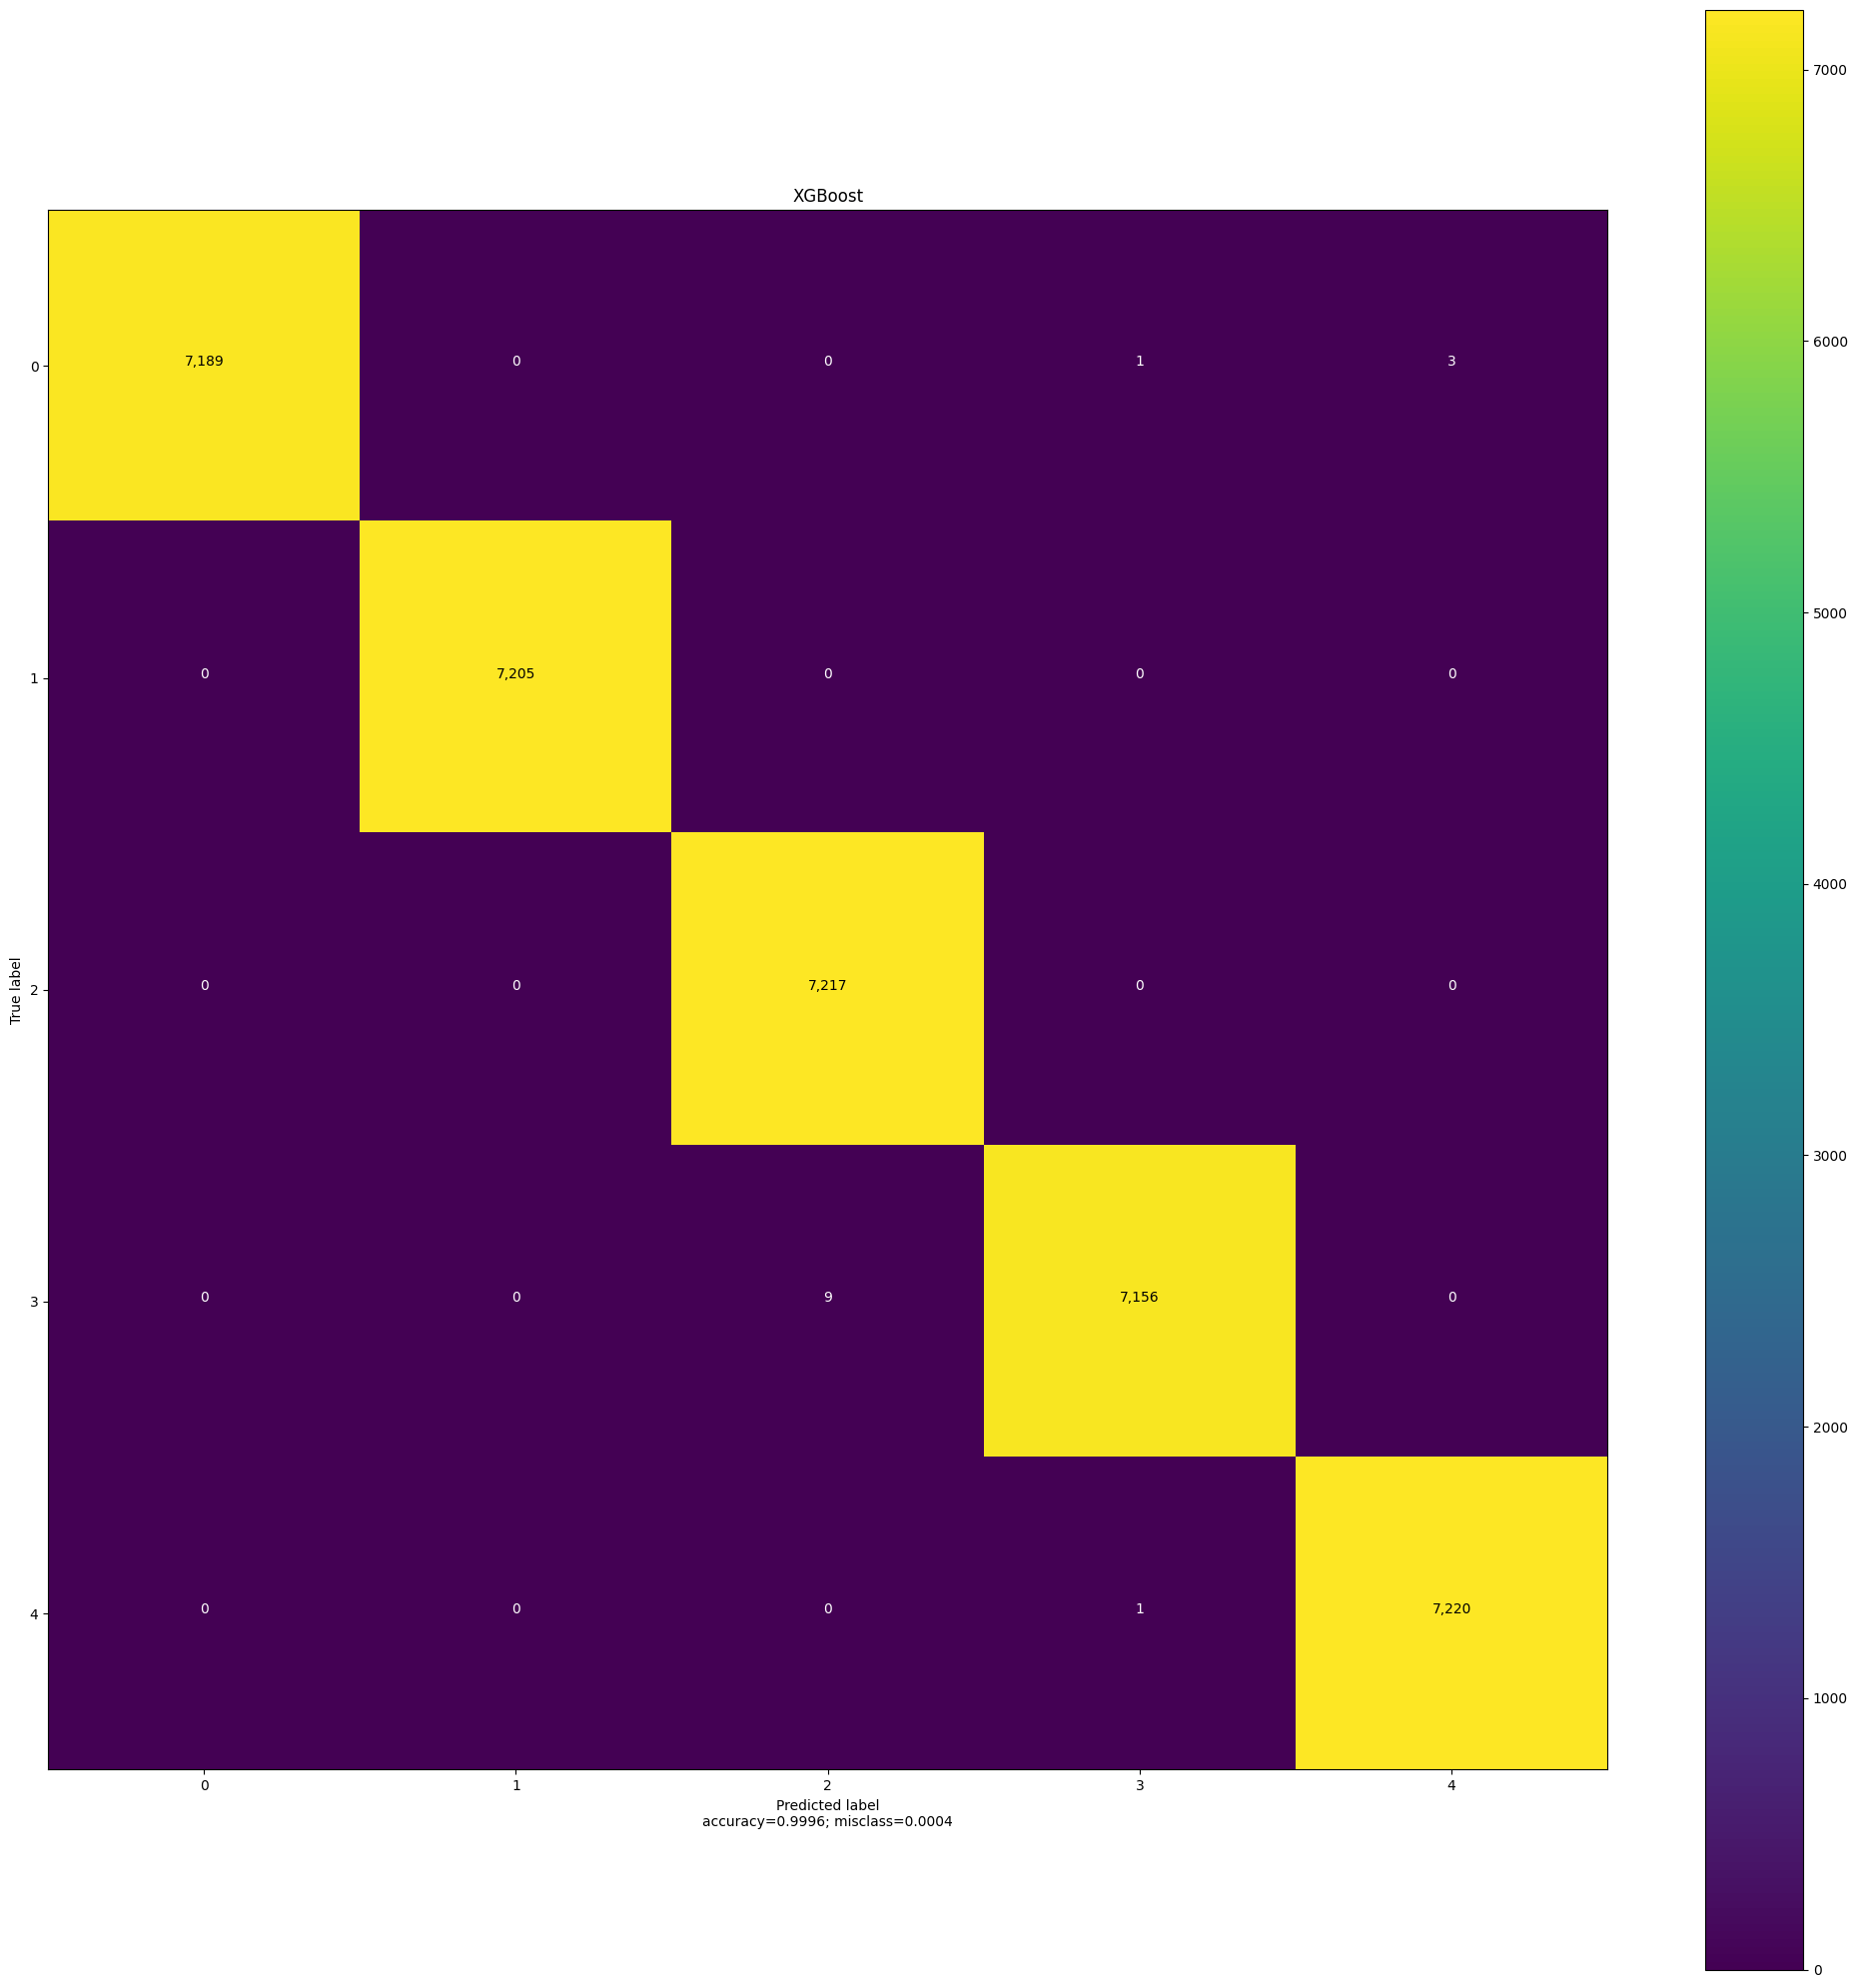

<Figure size 640x480 with 0 Axes>

In [168]:
plot_confusion_matrix(cm=confusion_matrix2 ,title= 'XGBoost')

In [173]:
Predict_X =  xgb_clf.predict(X_test_scaled)
scores = cross_val_score(xgb_clf, X_test_scaled, Y_test, cv=10)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X, zero_division=1)

In [174]:
print()
print('--------------------------- Results --------------------------------')
print()
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


--------------------------- Results --------------------------------


Model Accuracy:
 0.9988981787542939

Confusion matrix:
 [[3086    0    1    4    2]
 [   0 3081    0    0    0]
 [   1    0 3068    0    0]
 [   0    0    5 3115    1]
 [   3    0    0    0 3062]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3093
           1       1.00      1.00      1.00      3081
           2       1.00      1.00      1.00      3069
           3       1.00      1.00      1.00      3121
           4       1.00      1.00      1.00      3065

    accuracy                           1.00     15429
   macro avg       1.00      1.00      1.00     15429
weighted avg       1.00      1.00      1.00     15429




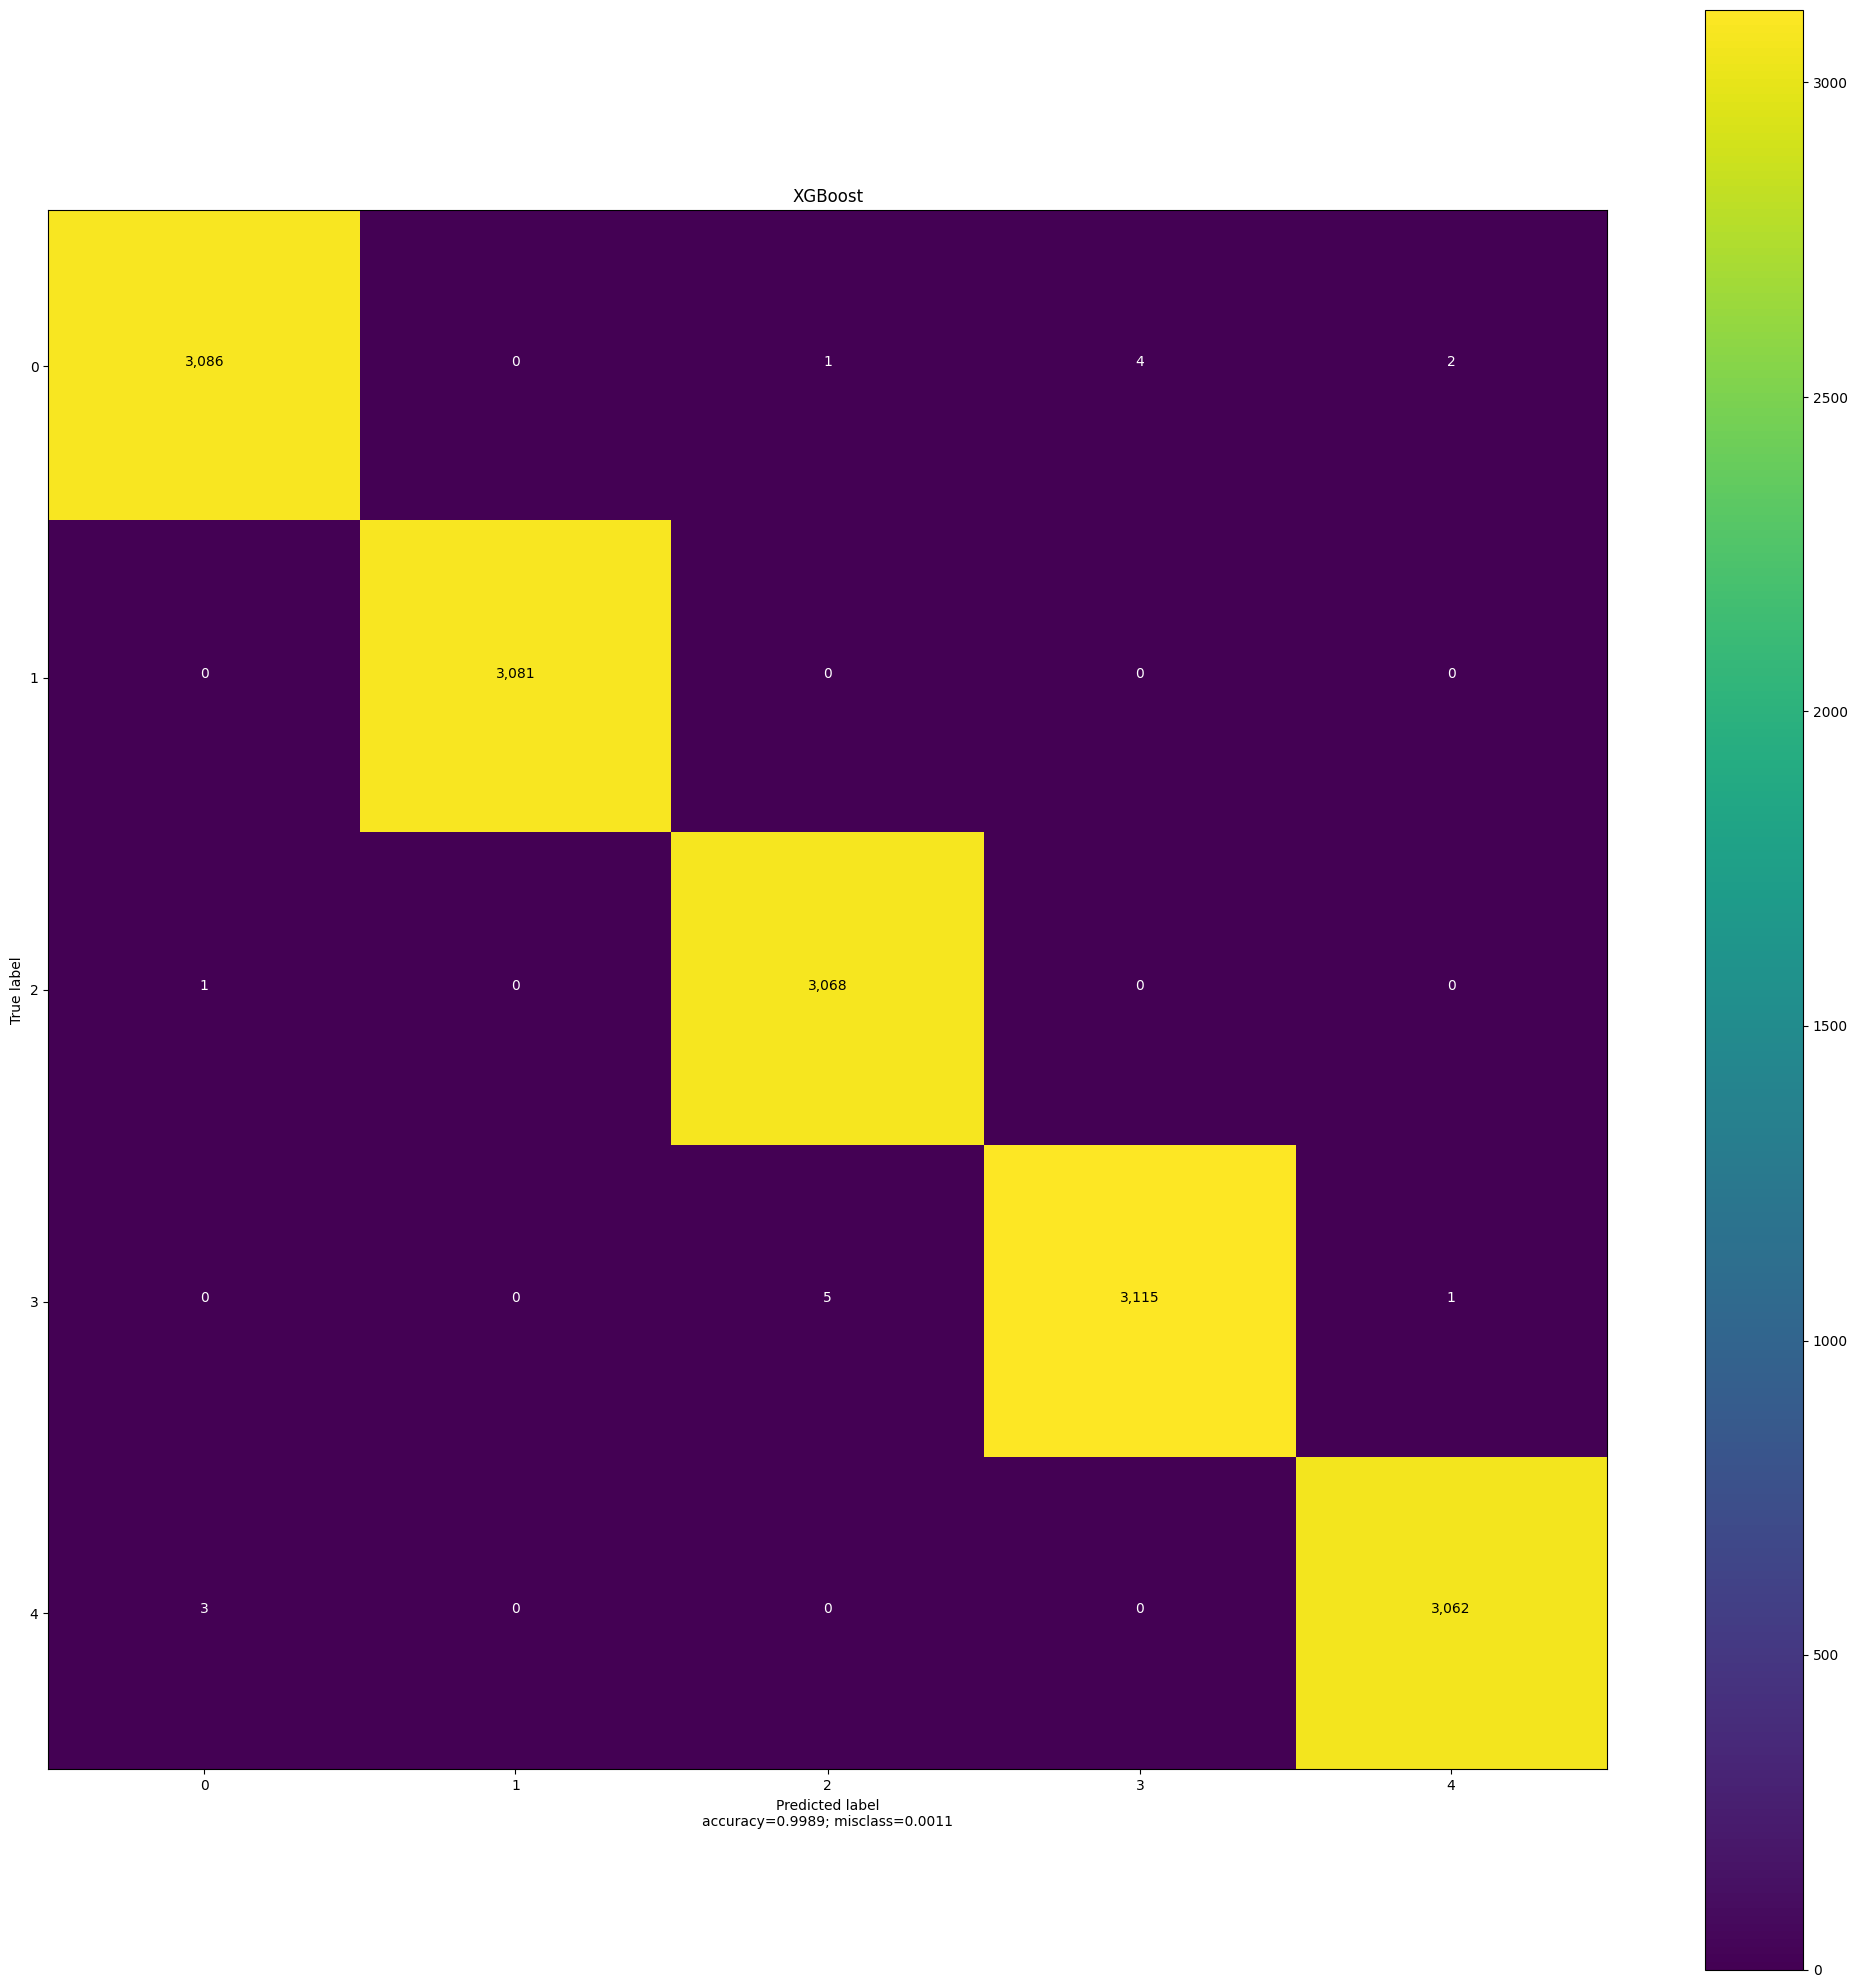

<Figure size 640x480 with 0 Axes>

In [175]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'XGBoost')

In [47]:
pd.DataFrame(X_test).to_csv('sample_data.csv', index=False)

In [ ]:

def process_csv_with_delay(sampled_data, model):
    for _, row in sampled_data.iterrows():
        prediction = model.predict([row])  # Assuming model expects a 2D array
        # Print the result
        if prediction[0] != 'BENIGN':
            print(f"Your agent is under attack: Attack Type : {prediction[0]}")
        else:
            print("No attack detected")
            
        sleep(5)

    
X_1 = pd.DataFrame(X_train)
with open('random_model1.pkl', 'rb') as f:
    model = pickle.load(f)
process_csv_with_delay(X_1, model)

In [177]:
accuracy = {'Logistic_Regression': 0.9158,'Random_Forest': 0.998,'Decision Tree': 0.9998 , 'XGBOOST':0.998,'SVM': 0.959}

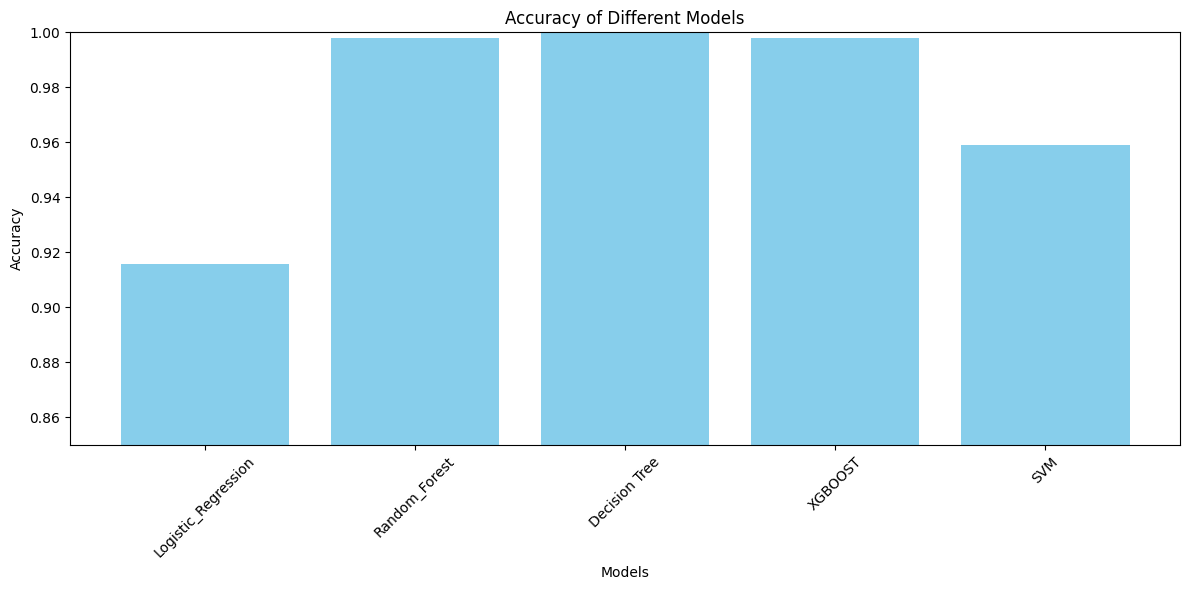

In [179]:
models = list(accuracy.keys())
accuracies = list(accuracy.values())

# Plot
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.85, 1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()